<a href="https://www.kaggle.com/code/kursatdinc/diabetes-eda-feature-engineering-ml?scriptVersionId=185956708" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Problem

Predicting whether people have diabetes when their characteristics are specified to develop a machine learning model that is capable of learning the data. Model the data analysis and feature engineering steps required before development. You are expected to realize.

# Dataset Story

The dataset is part of a larger dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the US. In the US Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city in the State of Arizona are the data used for diabetes research. The target variable is specified as "outcome", where 1 indicates a positive diabetes test result and 0 indicates a negative result.

*9 Variables, 768 Observation*

* **Pregnancies:** Number of pregnancies
* **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test
* **Blood Pressure:** Blood Pressure (Small blood pressure) (mm Hg)
* **SkinThickness:** Skin Thickness
* **Insulin:** 2-hour serum insulin (mu U/ml)
* **DiabetesPedigreeFunction:** Function (2-hour plasma glucose concentration in oral glucose tolerance test)
* **BMI:** Body mass index
* **Age:** Age (years)
* **Outcome:** Have the disease (1) or not (0)

# Importings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
def load():
    data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
    return data

df = load()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Overview & Preprocessing

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())


In [4]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Number of Unique Values #####################
Pregnancies                  17
Glucose                     136
BloodPressure  

In [5]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,0.00000,3.0000,10.00000,13.00000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,79.00000,117.0000,181.00000,196.00000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,38.70000,72.0000,90.00000,106.00000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,44.00000,51.33000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,293.00000,519.90000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,21.80000,32.0000,44.39500,50.75900,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.078,0.14035,0.3725,1.13285,1.69833,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,29.0000,58.00000,67.00000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.00000,1.00,1.00


> There are no missing observations in the data set, but observation units with 0 values in Glucose, Insulin, etc.observation units containing a value of 0 in variables such as Glucose, Insulin, etc. may represent a missing value. For example; a person's glucose or insulin value is 0 will not be possible. Taking this into account, we assign the zero values as NaN in the relevant values and then assign the missing We need to apply operations to the values.

In [6]:
min_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[min_zero_cols] = df[min_zero_cols].replace(0, np.nan)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Cat & Num Col Analysis

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
#############
Cat_Cols : ['Outcome']
#############
Num_Cols : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#############
Cat_But_Car : []


In [9]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))

            plt.subplot(1, 2, 1)
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.title("Frequency of " + col_name)
            plt.xticks(rotation=90)

            plt.subplot(1, 2, 2)
            values = dataframe[col_name].value_counts()
            plt.pie(x=values, labels=values.index, autopct=lambda p: "{:.2f}% ({:.0f})".format(p, p/100 * sum(values)))
            plt.title("Frequency of " + col_name)
            plt.legend(labels=["{} - {:.2f}%".format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                    loc="upper center", bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            
            plt.subplot(1, 2, 1)
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.title("Frequency of " + col_name)
            plt.xticks(rotation=90)

            plt.subplot(1, 2, 2)
            values = dataframe[col_name].value_counts()
            plt.pie(x=values, labels=values.index, autopct=lambda p: "{:.2f}% ({:.0f})".format(p, p/100 * sum(values)))
            plt.title("Frequency of " + col_name)
            plt.legend(labels=["{} - {:.2f}%".format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                    loc="upper center", bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
            plt.show(block=True)

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


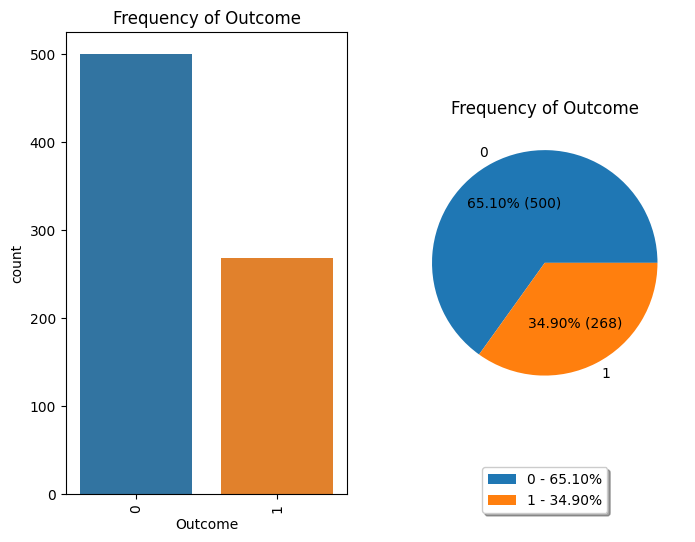

In [10]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [11]:
def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(numerical_col)
    print("##########################################")
    print(dataframe[numerical_col].describe(quantiles).T)
    print("##########################################")

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=hist_bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Distribution")
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], fill=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Density")
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + " QQ Plot")
        
        plt.tight_layout()
        plt.show(block=True)

Pregnancies
##########################################
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64
##########################################


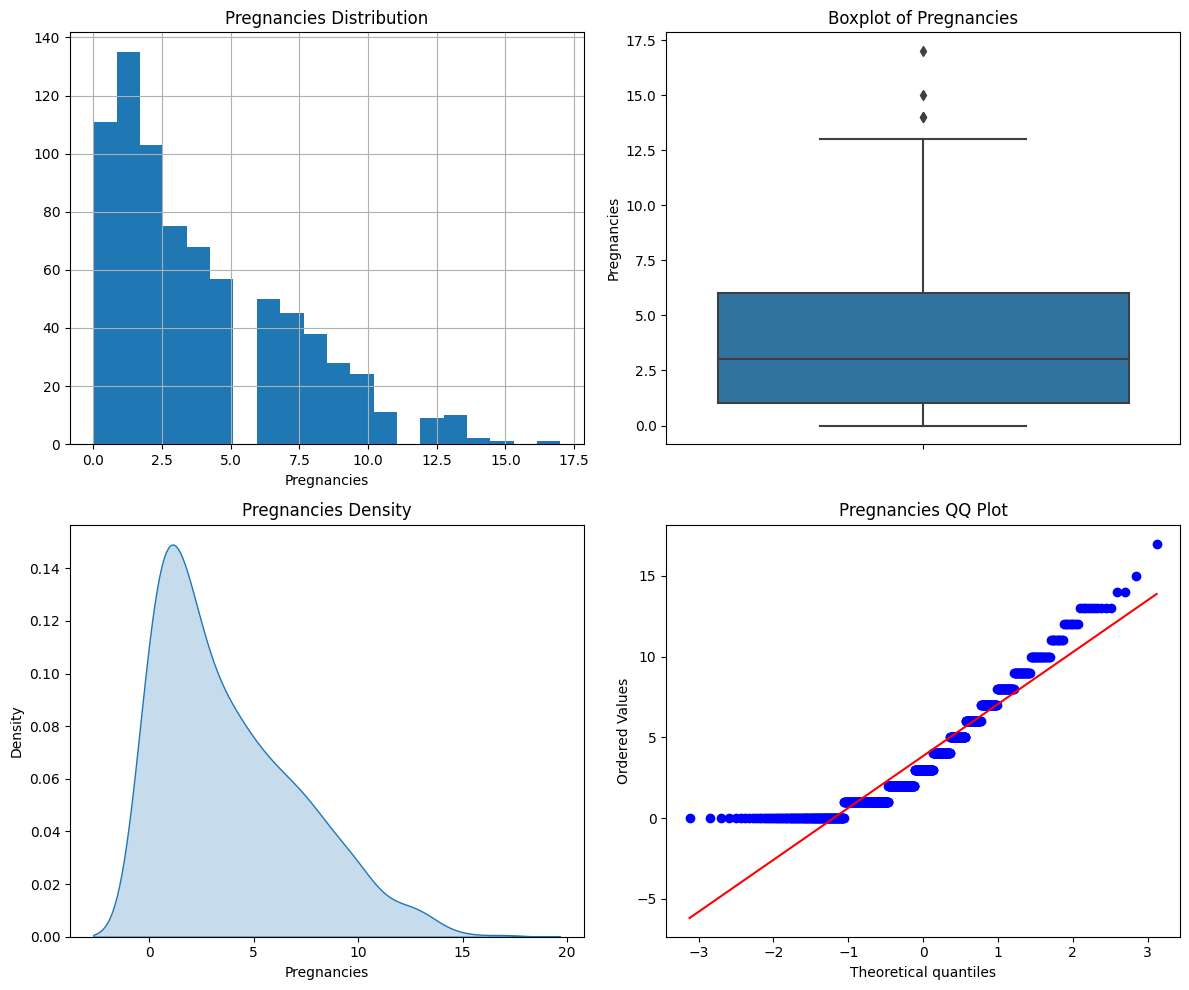

Glucose
##########################################
count    763.000000
mean     121.686763
std       30.535641
min       44.000000
5%        80.000000
10%       86.200000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      135.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64
##########################################


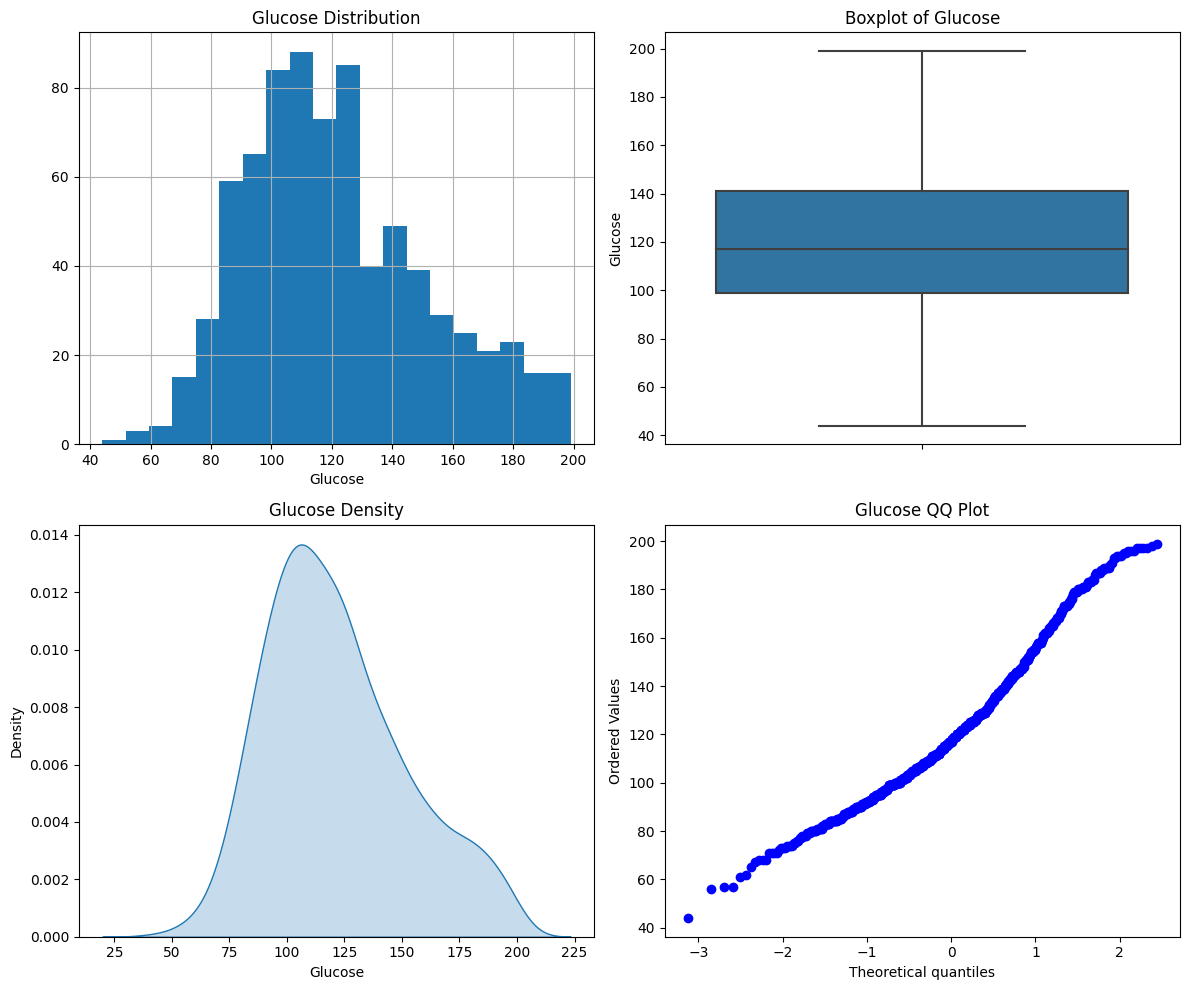

BloodPressure
##########################################
count    733.000000
mean      72.405184
std       12.382158
min       24.000000
5%        52.000000
10%       58.000000
20%       62.000000
30%       66.000000
40%       70.000000
50%       72.000000
60%       75.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       92.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64
##########################################


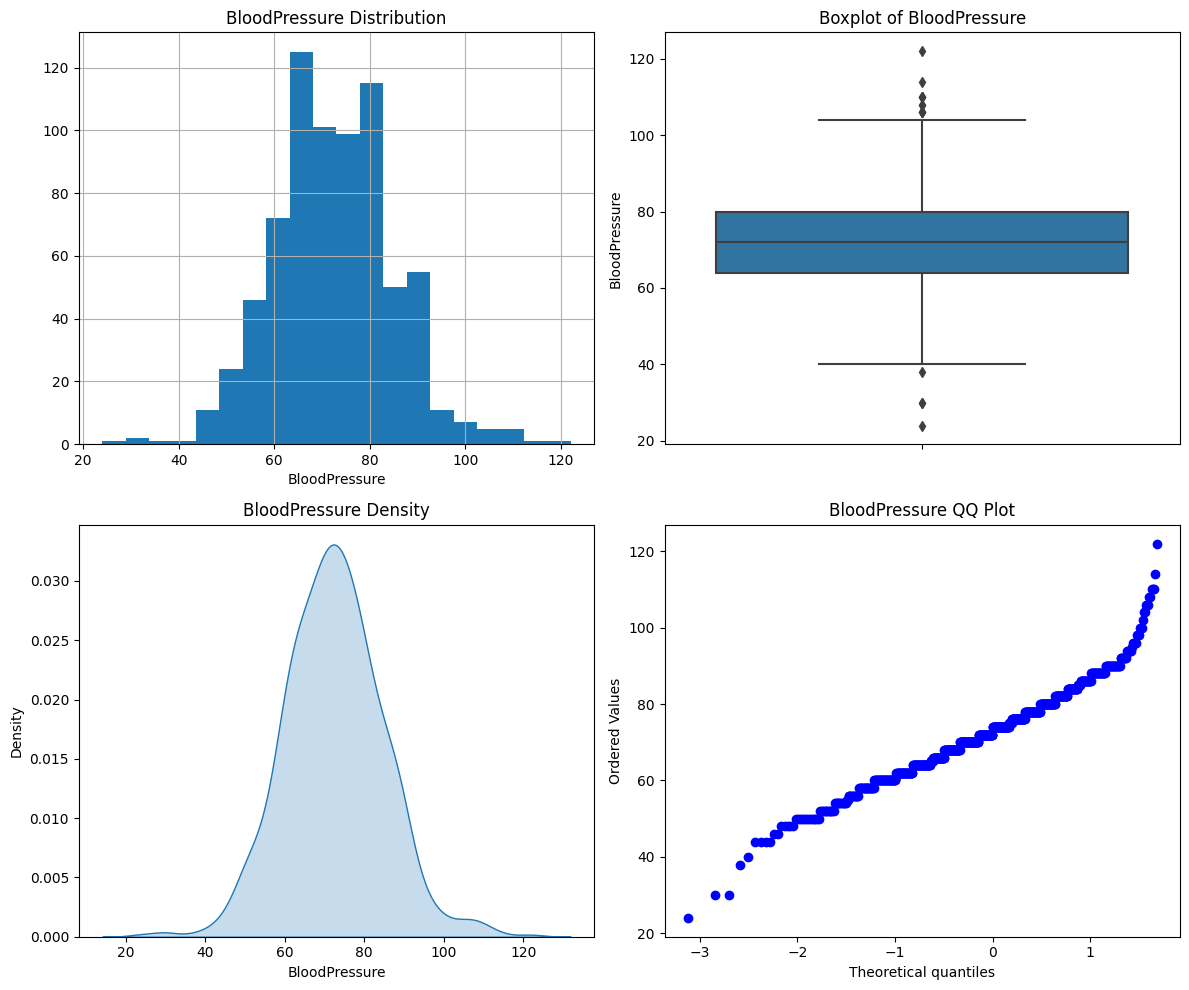

SkinThickness
##########################################
count    541.000000
mean      29.153420
std       10.476982
min        7.000000
5%        13.000000
10%       16.000000
20%       19.000000
30%       23.000000
40%       27.000000
50%       29.000000
60%       32.000000
70%       34.000000
80%       38.000000
90%       42.000000
95%       46.000000
99%       53.200000
max       99.000000
Name: SkinThickness, dtype: float64
##########################################


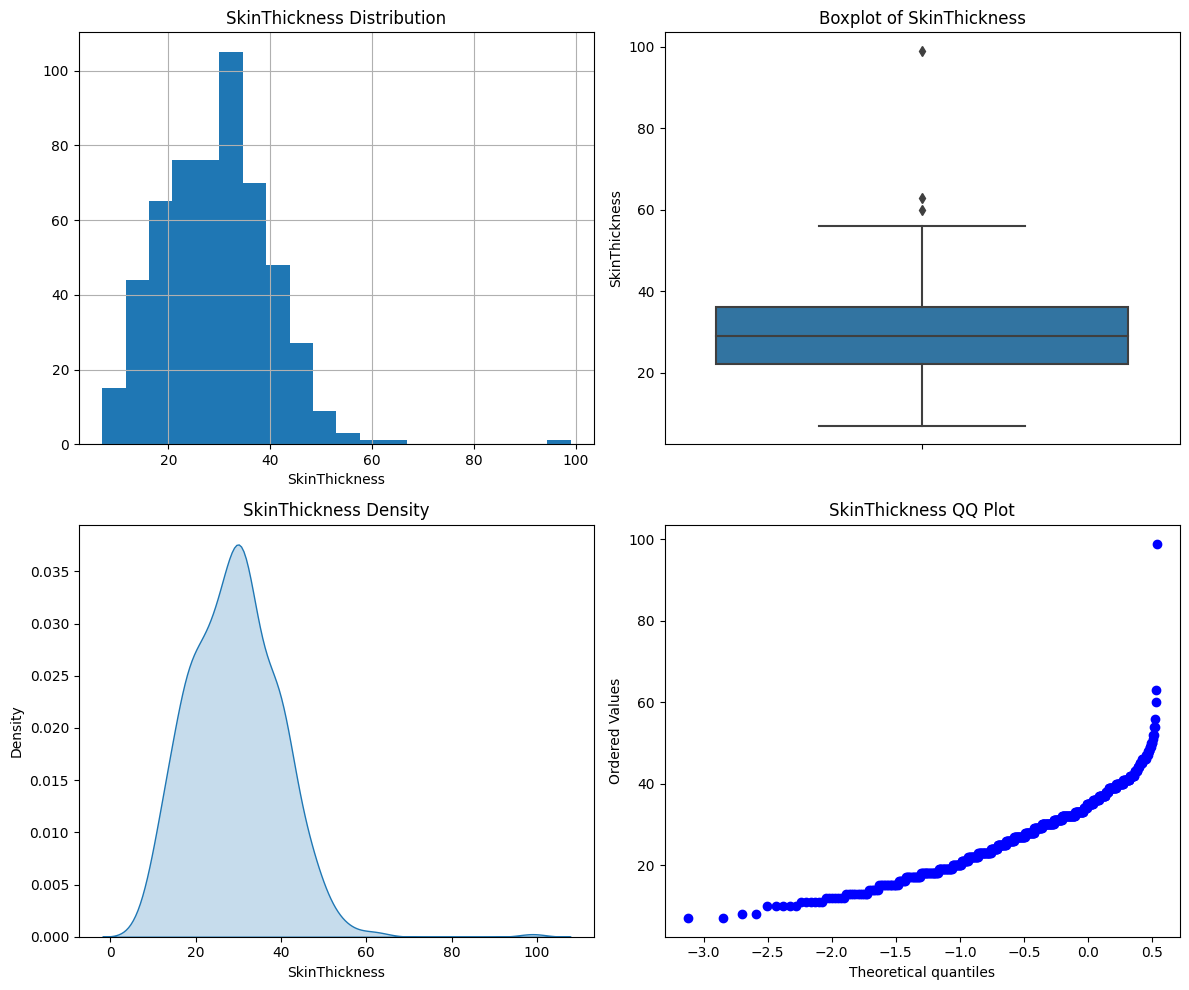

Insulin
##########################################
count    394.000000
mean     155.548223
std      118.775855
min       14.000000
5%        41.650000
10%       50.300000
20%       69.200000
30%       87.900000
40%      105.000000
50%      125.000000
60%      145.800000
70%      176.000000
80%      210.000000
90%      292.400000
95%      395.500000
99%      580.470000
max      846.000000
Name: Insulin, dtype: float64
##########################################


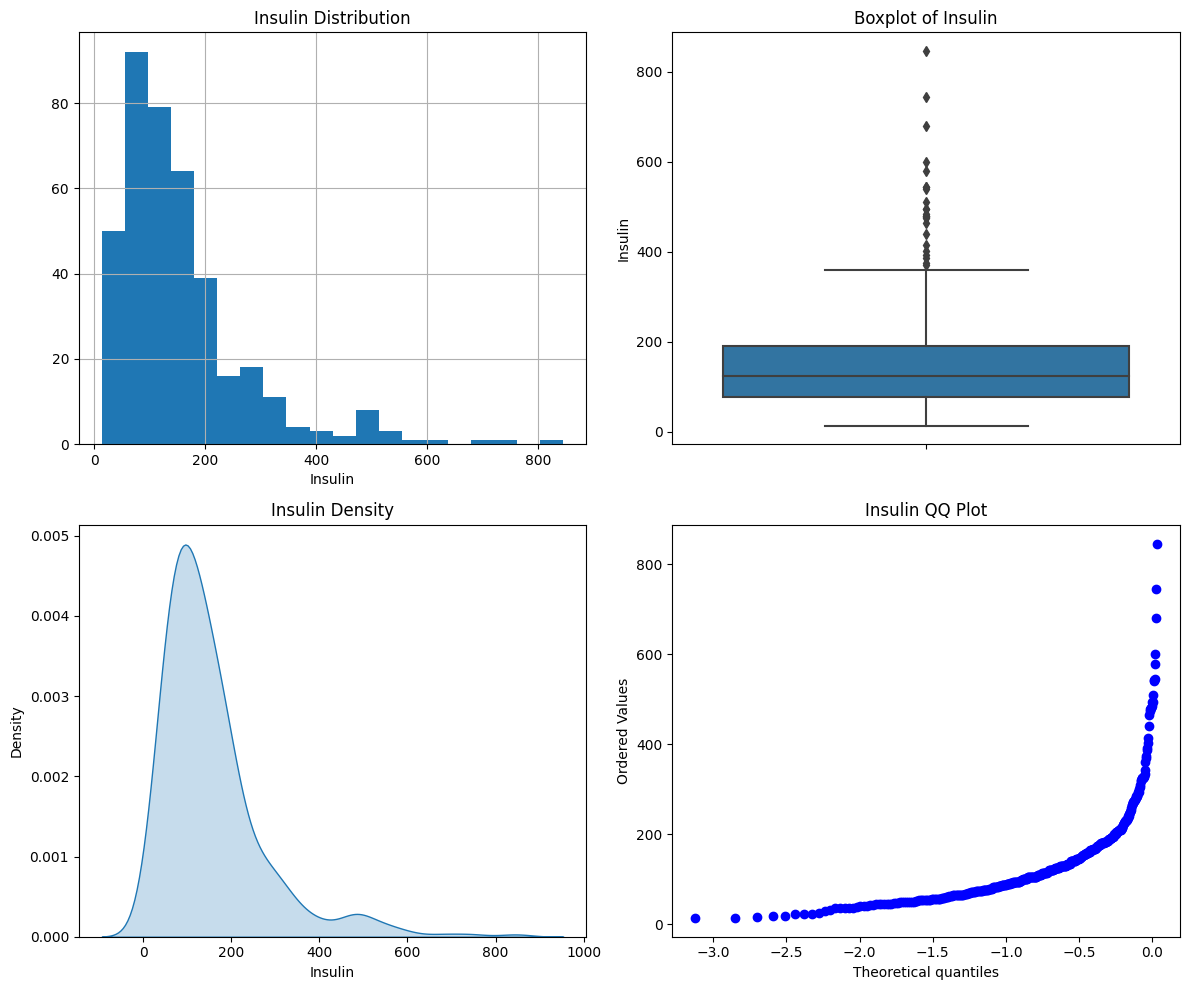

BMI
##########################################
count    757.000000
mean      32.457464
std        6.924988
min       18.200000
5%        22.200000
10%       24.000000
20%       26.200000
30%       28.400000
40%       30.340000
50%       32.300000
60%       33.800000
70%       35.500000
80%       37.880000
90%       41.620000
95%       44.500000
99%       51.012000
max       67.100000
Name: BMI, dtype: float64
##########################################


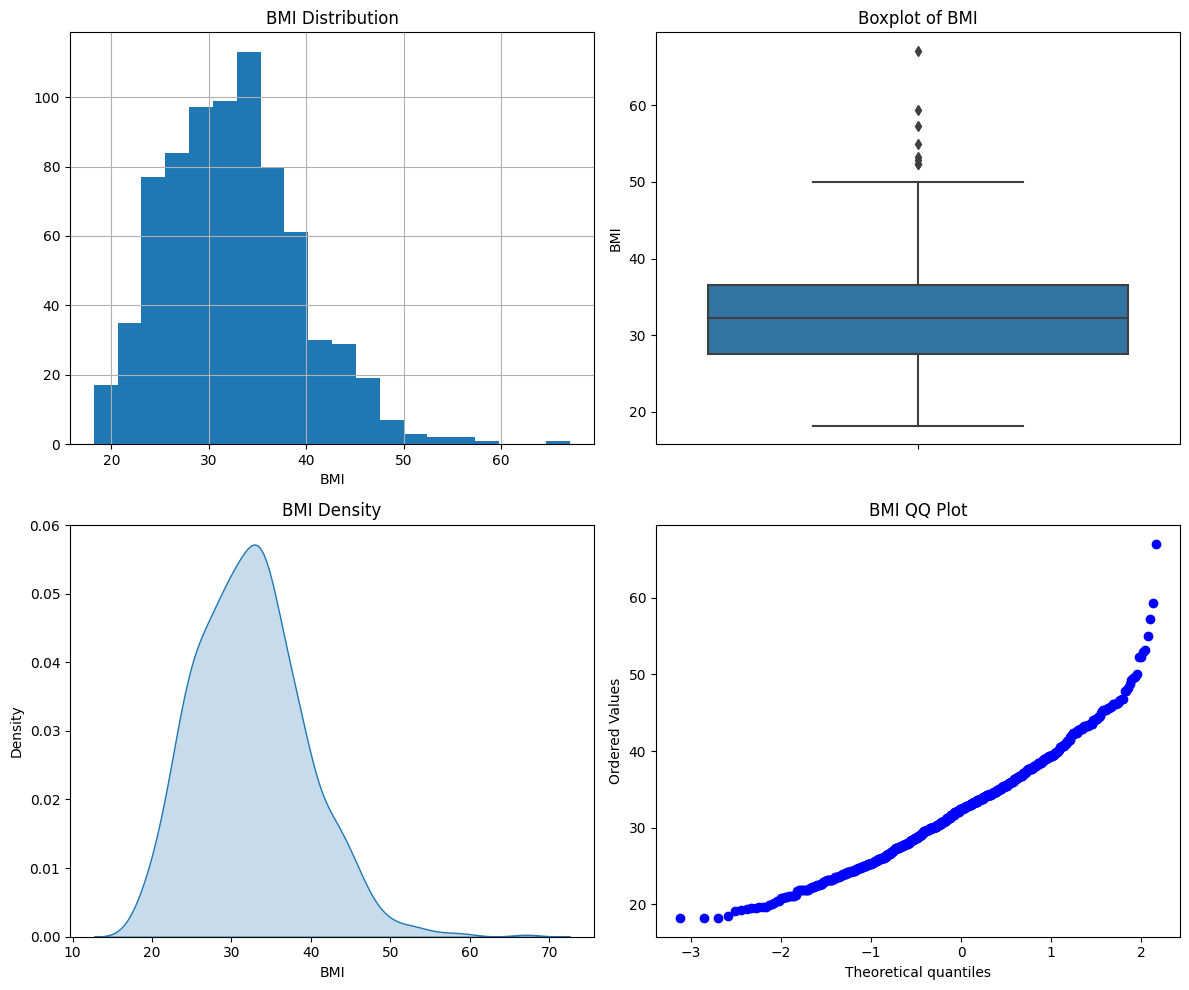

DiabetesPedigreeFunction
##########################################
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
##########################################


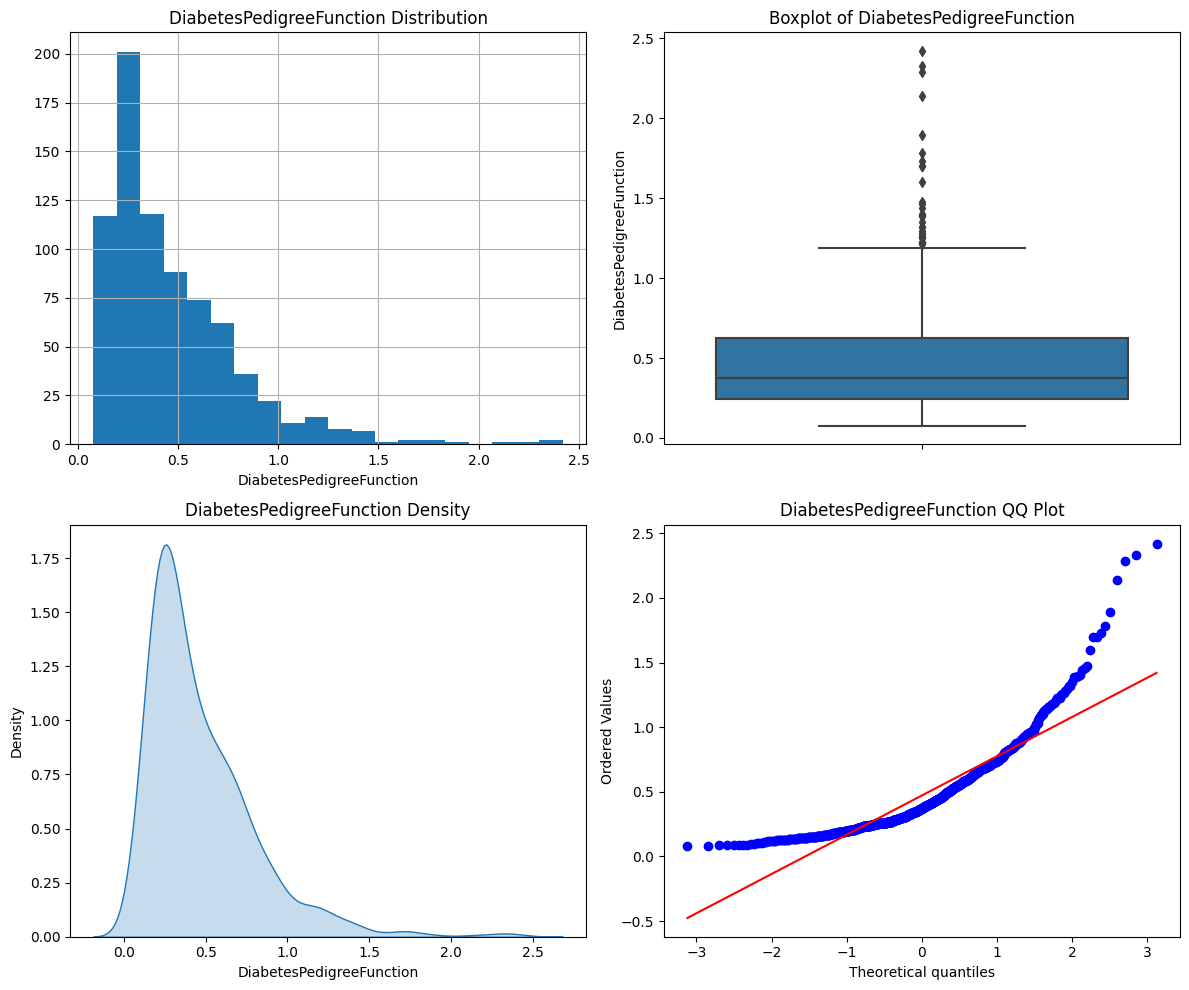

Age
##########################################
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64
##########################################


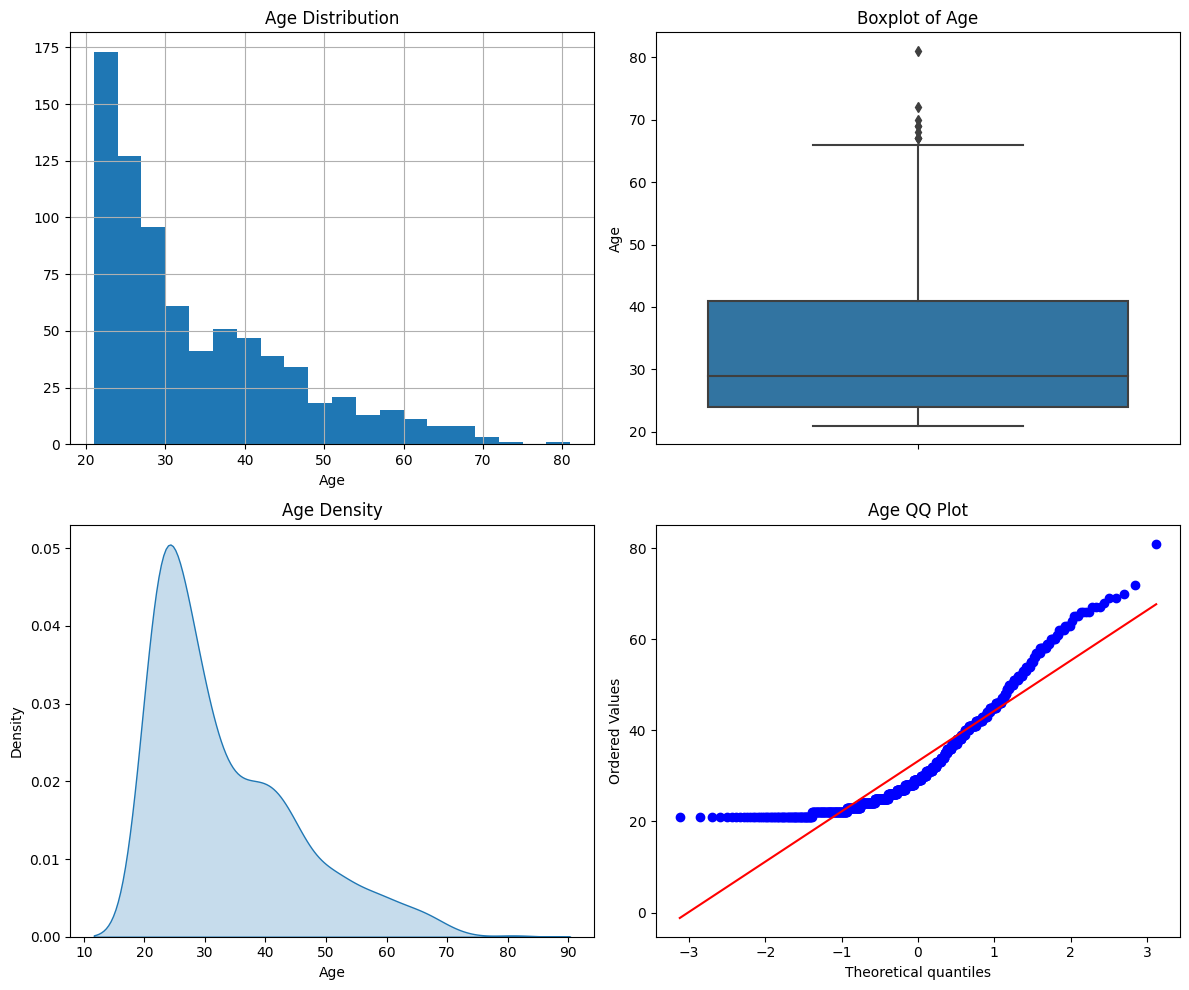

In [12]:
for col in num_cols:
    num_summary(df, col, plot=True)

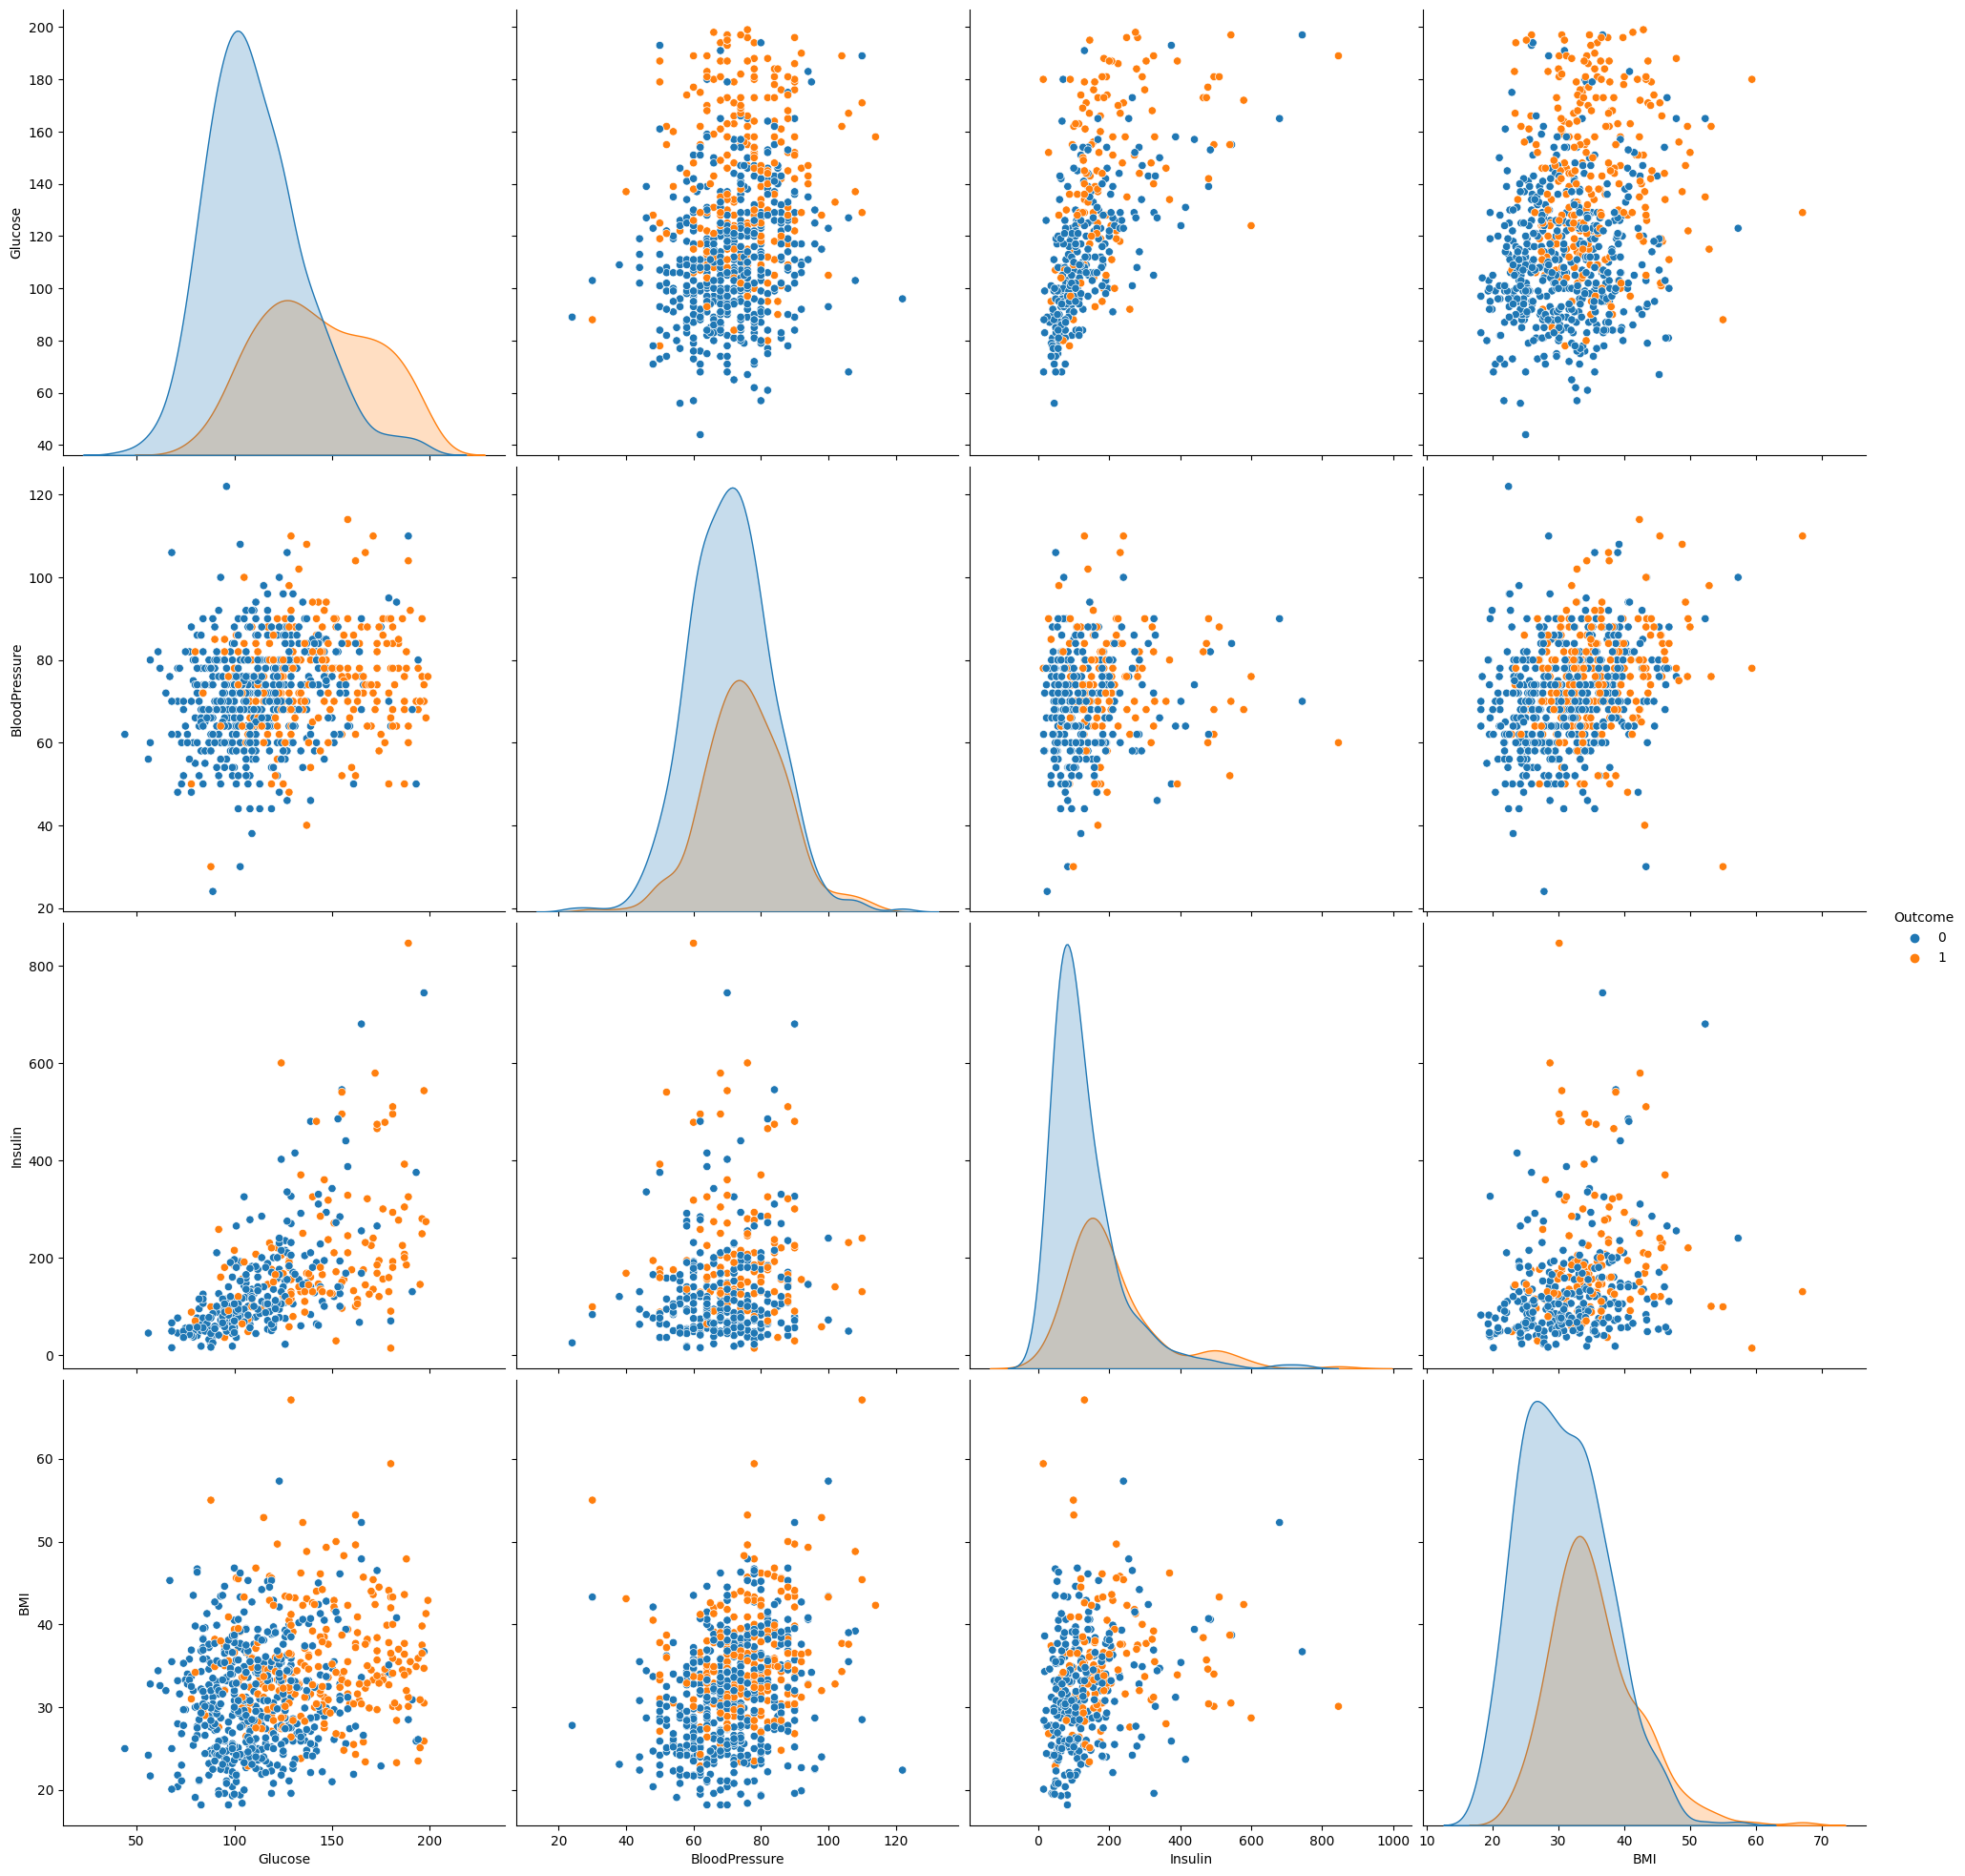

In [13]:
analyze_cols = ["Glucose", "BloodPressure", "Insulin", "BMI"]
sns.pairplot(data=df, vars=analyze_cols, hue="Outcome", height=5)

# Target Summary

In [14]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "TARGET_COUNT": dataframe.groupby(categorical_col)[target].count(),
                        "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")
    print("##########################################")

    if plot:
        plt.subplots(1, 2, figsize=(8, 6))

        plt.subplot(1, 2, 1)
        sns.countplot(x=categorical_col, data=dataframe)
        plt.title("Frequency of " + categorical_col)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[categorical_col].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: "{:.2f}% ({:.0f})".format(p, p/100 * sum(values)))
        plt.title("Frequency of " + categorical_col)
        plt.legend(labels=["{} - {:.2f}%".format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc="upper center", bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

         TARGET_MEAN  TARGET_COUNT      RATIO
Outcome                                      
0                0.0           500  65.104167
1                1.0           268  34.895833


##########################################


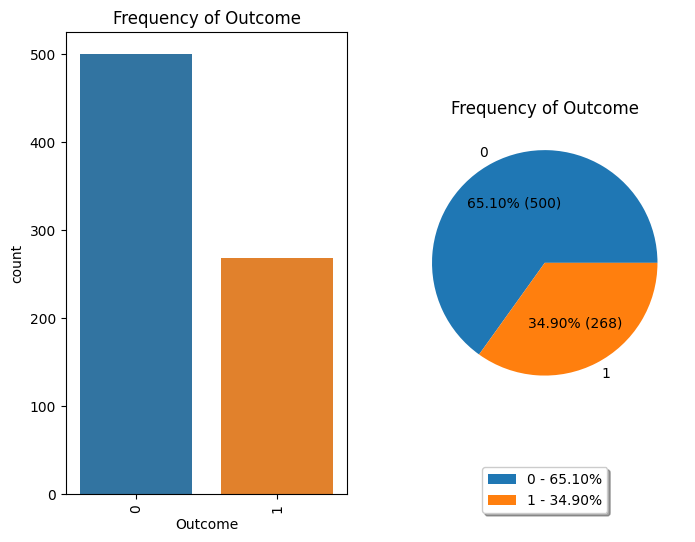

In [15]:
for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col, plot=True)

In [16]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    # Group by target and calculate mean
    summary_df = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(summary_df)
    print("##########################################")

    if plot:

        # Bar plot
        summary_df.plot(kind="bar", legend=False)
        plt.title(f"Mean of {numerical_col} by {target}")
        plt.xlabel(target)
        plt.ylabel(f"Mean of {numerical_col}")
        plt.show(block=True)

         Pregnancies
Outcome             
0           3.298000
1           4.865672
##########################################


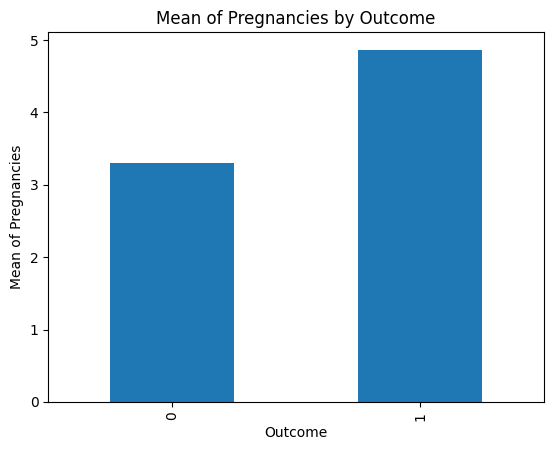

            Glucose
Outcome            
0        110.643863
1        142.319549
##########################################


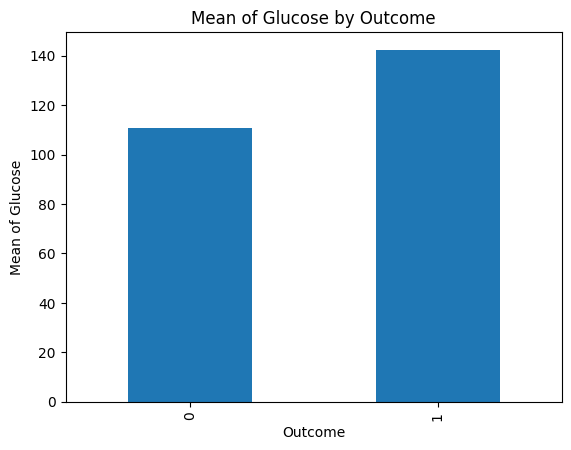

         BloodPressure
Outcome               
0            70.877339
1            75.321429
##########################################


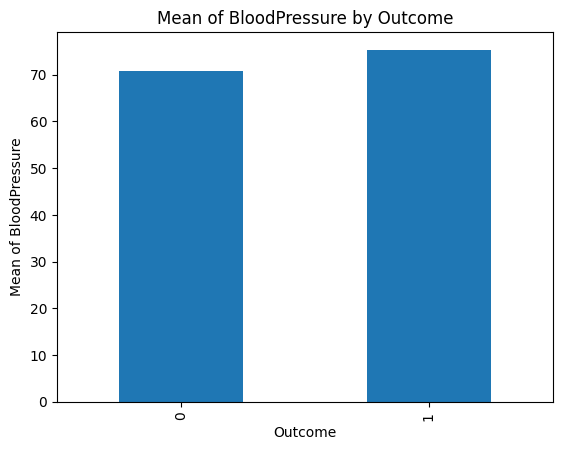

         SkinThickness
Outcome               
0            27.235457
1            33.000000
##########################################


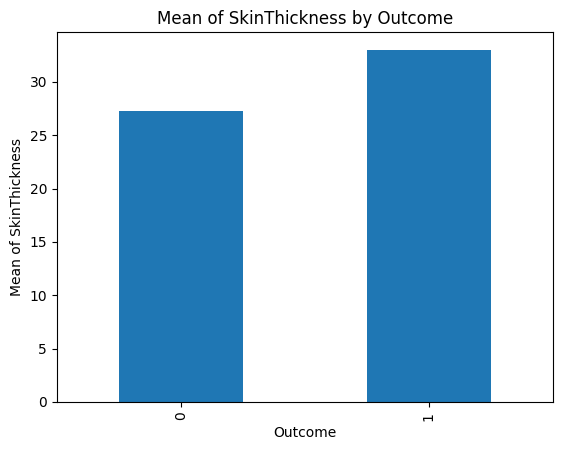

            Insulin
Outcome            
0        130.287879
1        206.846154
##########################################


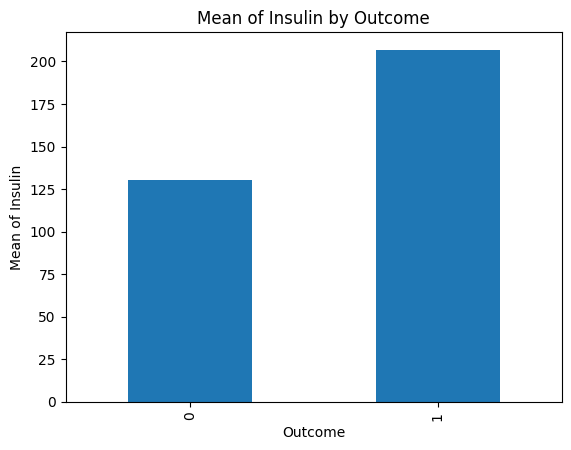

               BMI
Outcome           
0        30.859674
1        35.406767
##########################################


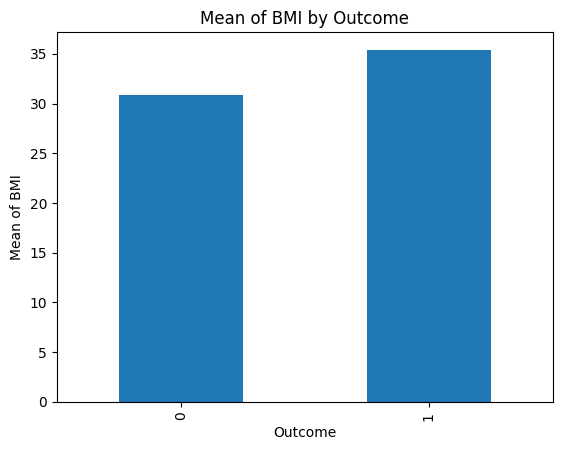

         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500
##########################################


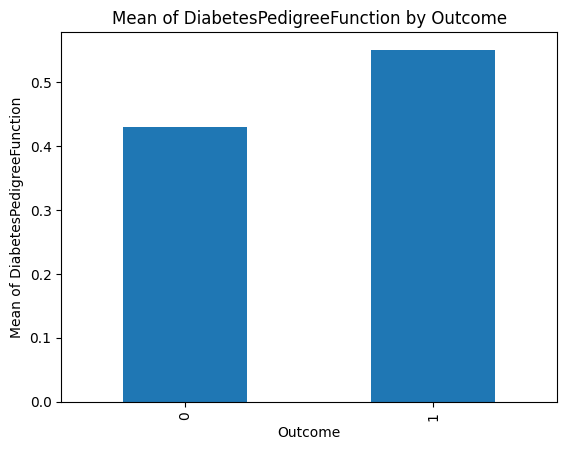

               Age
Outcome           
0        31.190000
1        37.067164
##########################################


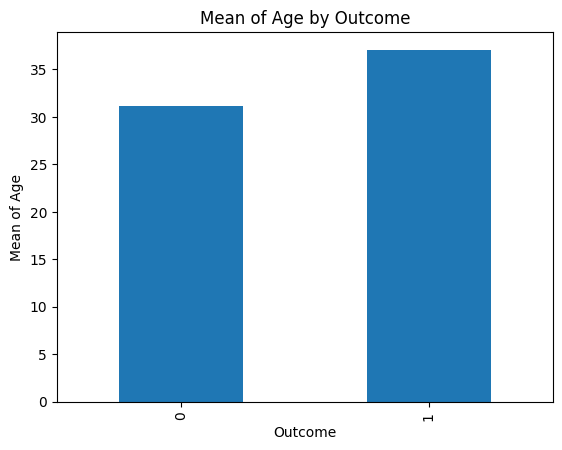

In [17]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Outlier Analysis

In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head(10))
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [20]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction True
Age False
Outcome False


In [21]:
for col in df.columns:
    print(col)
    print("######")
    print(grab_outliers(df, col))
    print("\n")

Pregnancies
######
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
None


Glucose
######
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
None


BloodPressure
######
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
None


SkinThickness
######
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2    197.0           70.0           99.0      NaN  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1  
None


Insulin
######
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
13             1    189.0           60.0           23.0    846.0  30.1   
228            4    197.0           70.0           39.0    744.0  

# Missing Values Analysis

In [22]:
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(10, 8))
        plt.bar(missing_df.index, missing_df["ratio"]) 
        plt.xlabel("Features")
        plt.ylabel("Percentage of Missing Values")
        plt.title("Missing Values by Feature")

    if na_name:
        return na_columns

def missing_vs_target(dataframe, target, na_columns, plot=False):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        summary_df = pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}).reset_index()
        print(summary_df)
        if plot:
     
            ax = summary_df.plot(x=summary_df.columns[0], y="TARGET_MEAN", kind="bar", legend=False)
            plt.title(f"Mean of {col} by {target}")
            plt.xlabel(target)
            plt.ylabel(f"Mean of {col}")

            for i, v in enumerate(summary_df["Count"]):
                ax.text(i, summary_df["TARGET_MEAN"][i], str(v), ha="center", va="bottom")

            plt.show(block=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
##########################################


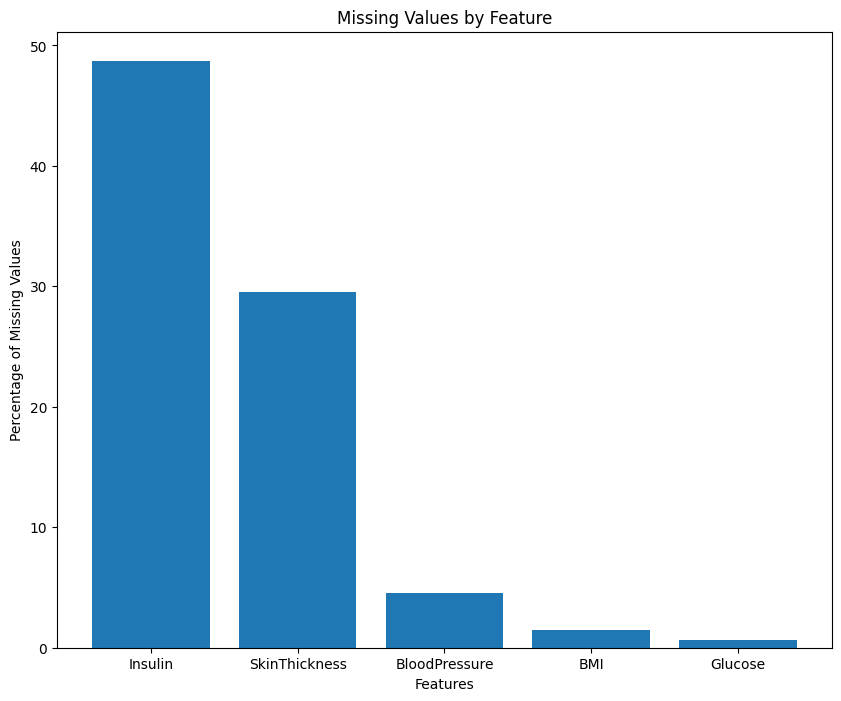

In [23]:
missing_col = missing_values_table(df, na_name=True, plot=True)

   Glucose_NA_FLAG  TARGET_MEAN  Count
0                0     0.348624    763
1                1     0.400000      5


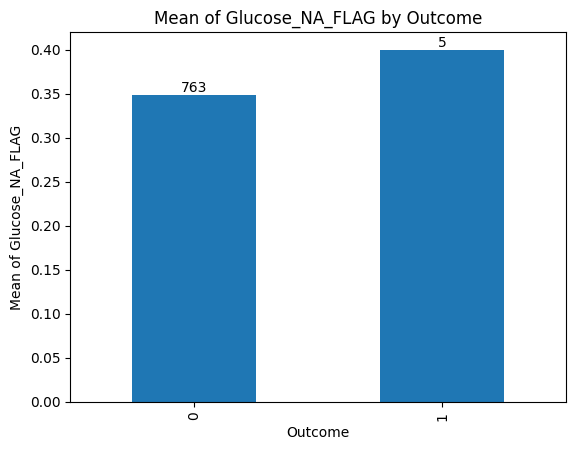

   BloodPressure_NA_FLAG  TARGET_MEAN  Count
0                      0     0.343793    733
1                      1     0.457143     35


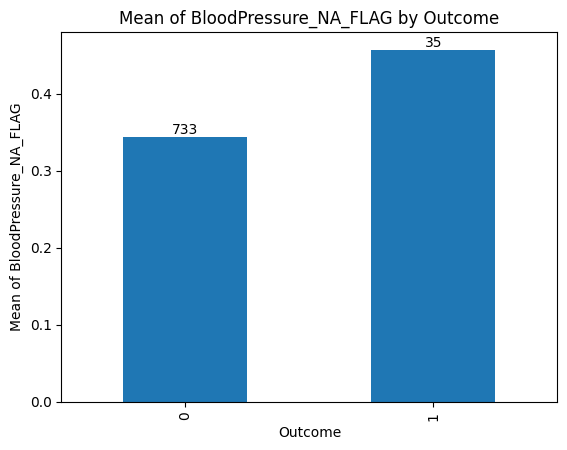

   SkinThickness_NA_FLAG  TARGET_MEAN  Count
0                      0     0.332717    541
1                      1     0.387665    227


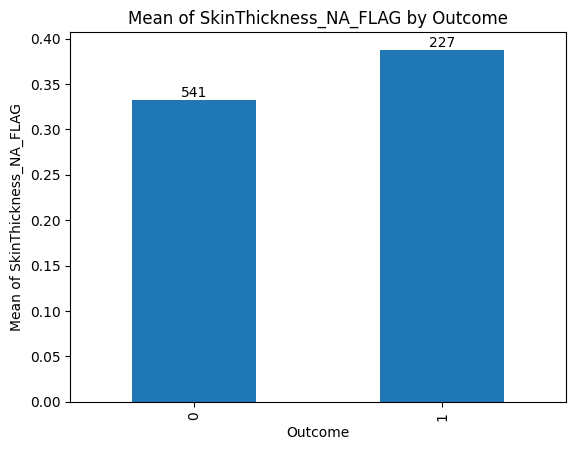

   Insulin_NA_FLAG  TARGET_MEAN  Count
0                0     0.329949    394
1                1     0.368984    374


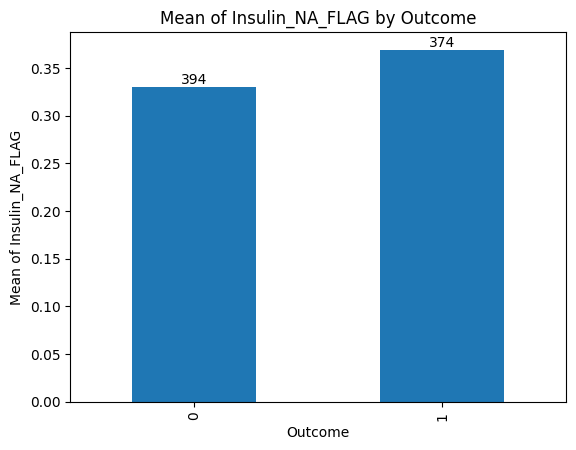

   BMI_NA_FLAG  TARGET_MEAN  Count
0            0     0.351387    757
1            1     0.181818     11


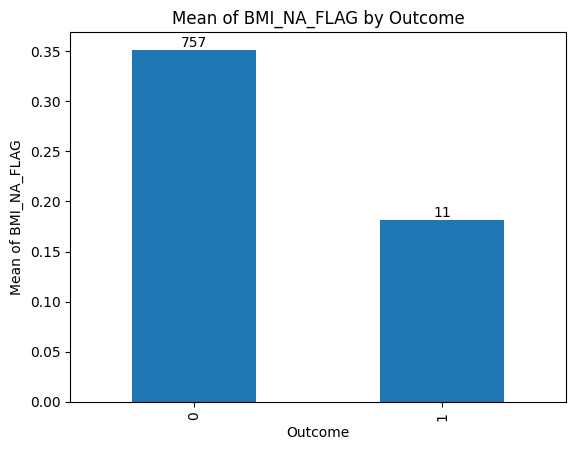

In [24]:
missing_vs_target(df, "Outcome", missing_col, plot=True)

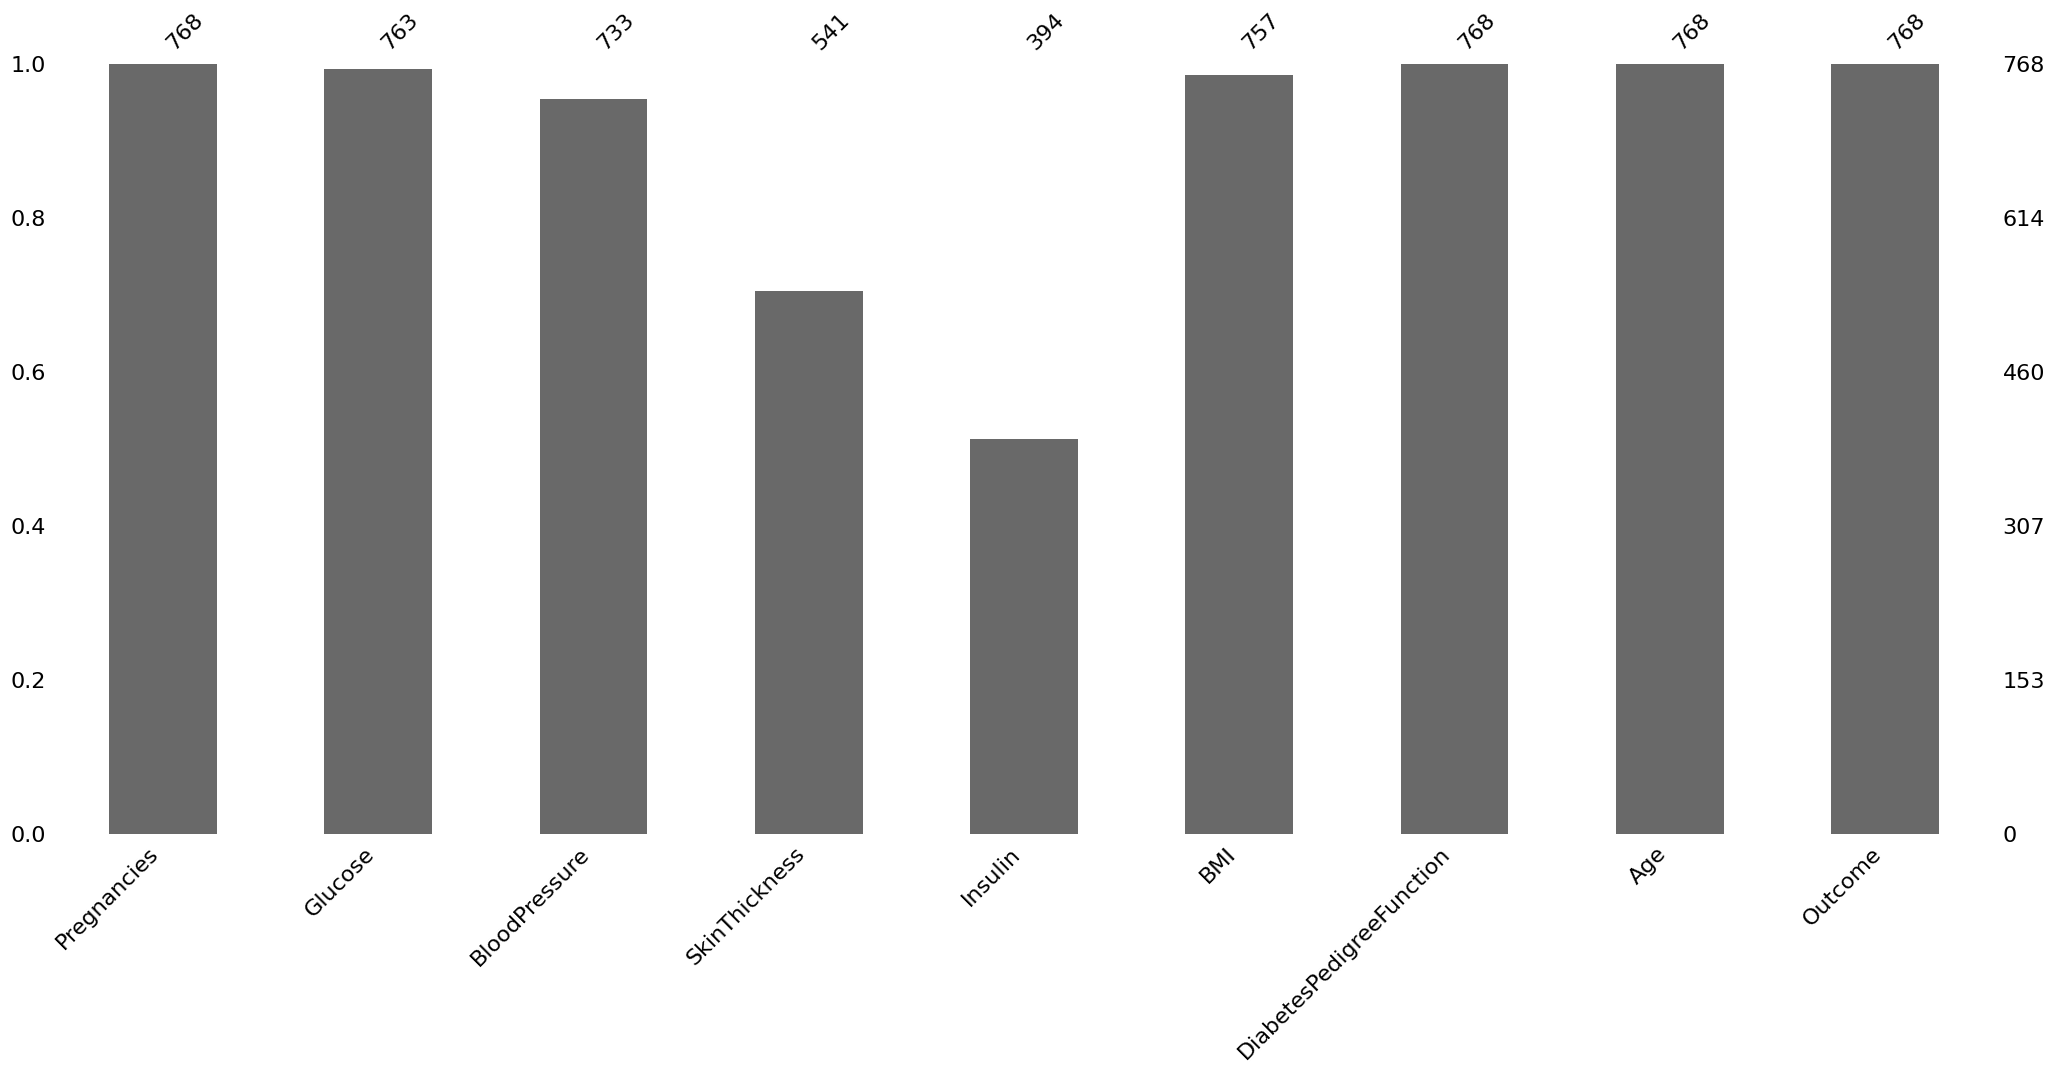

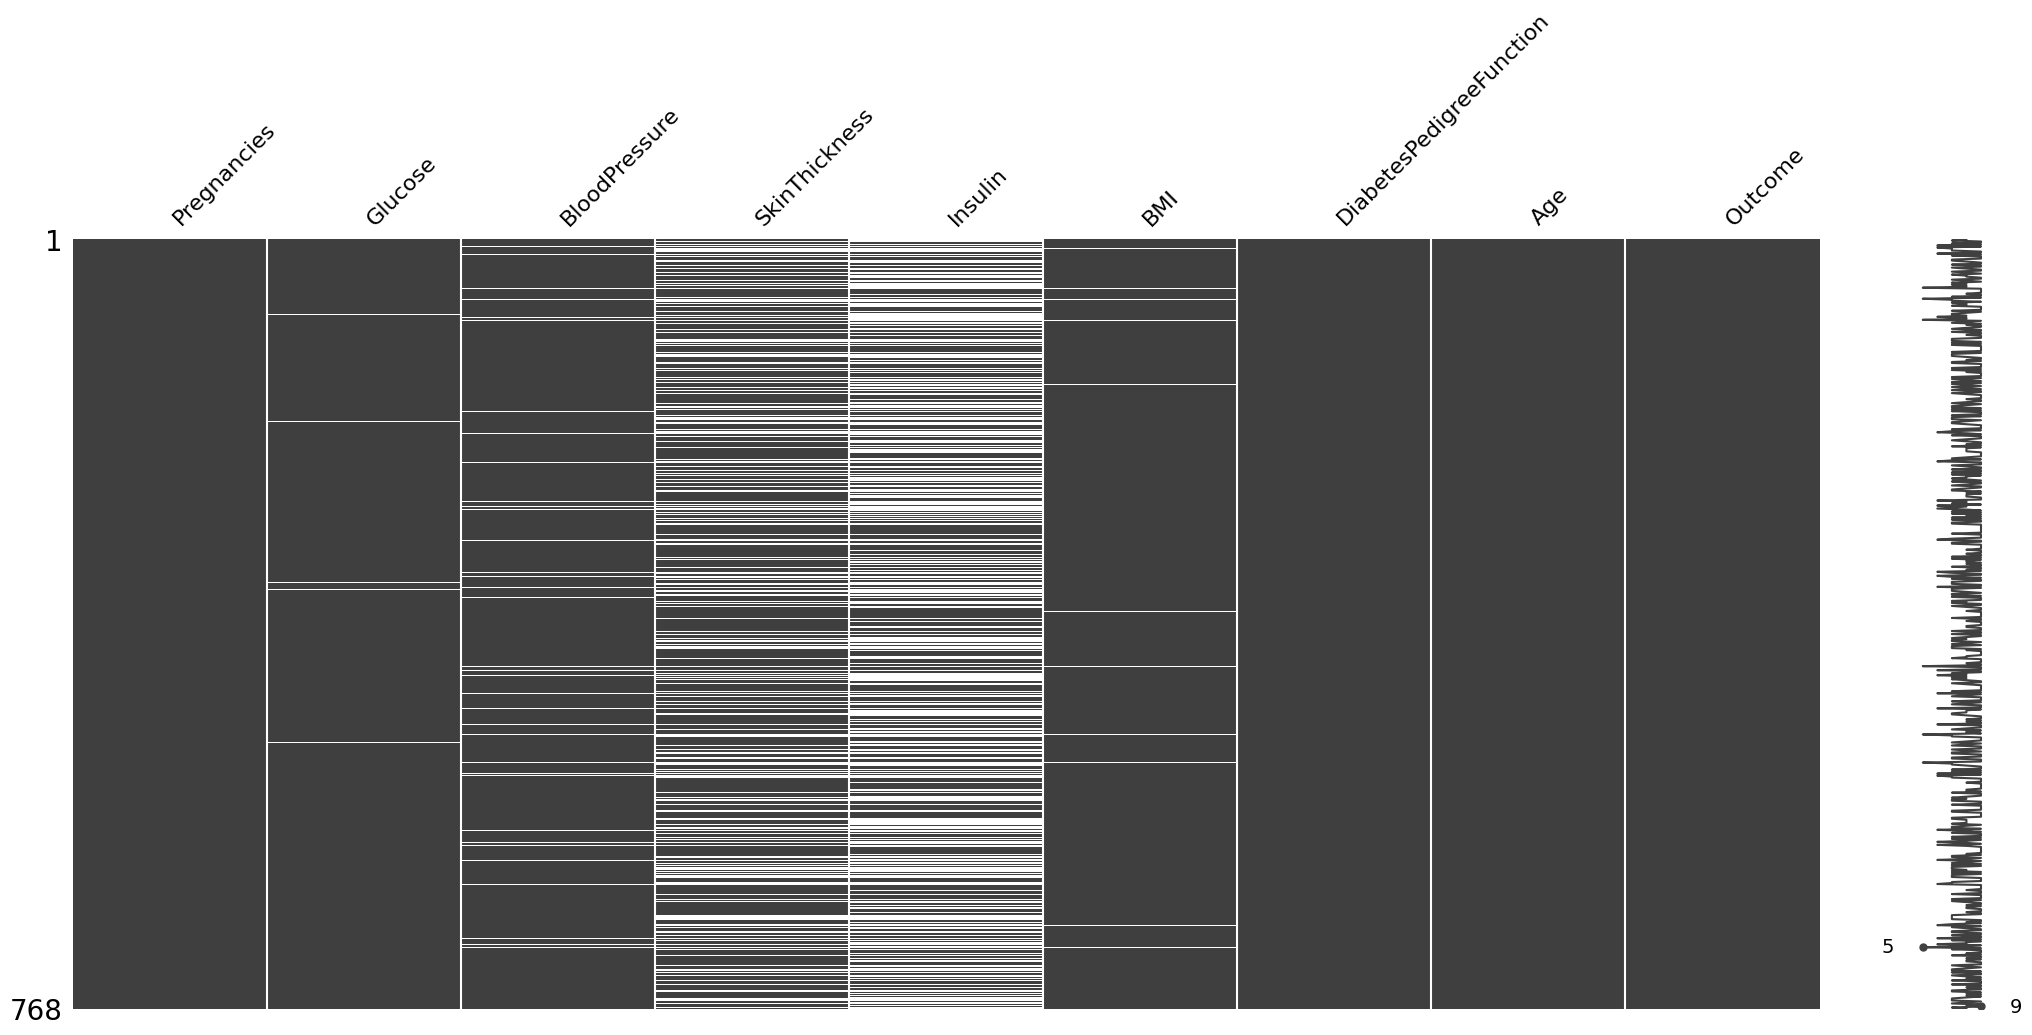

In [25]:
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

# Correlation Analysis

In [26]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, annot=True, cmap="RdBu")
        plt.show()
    return drop_list

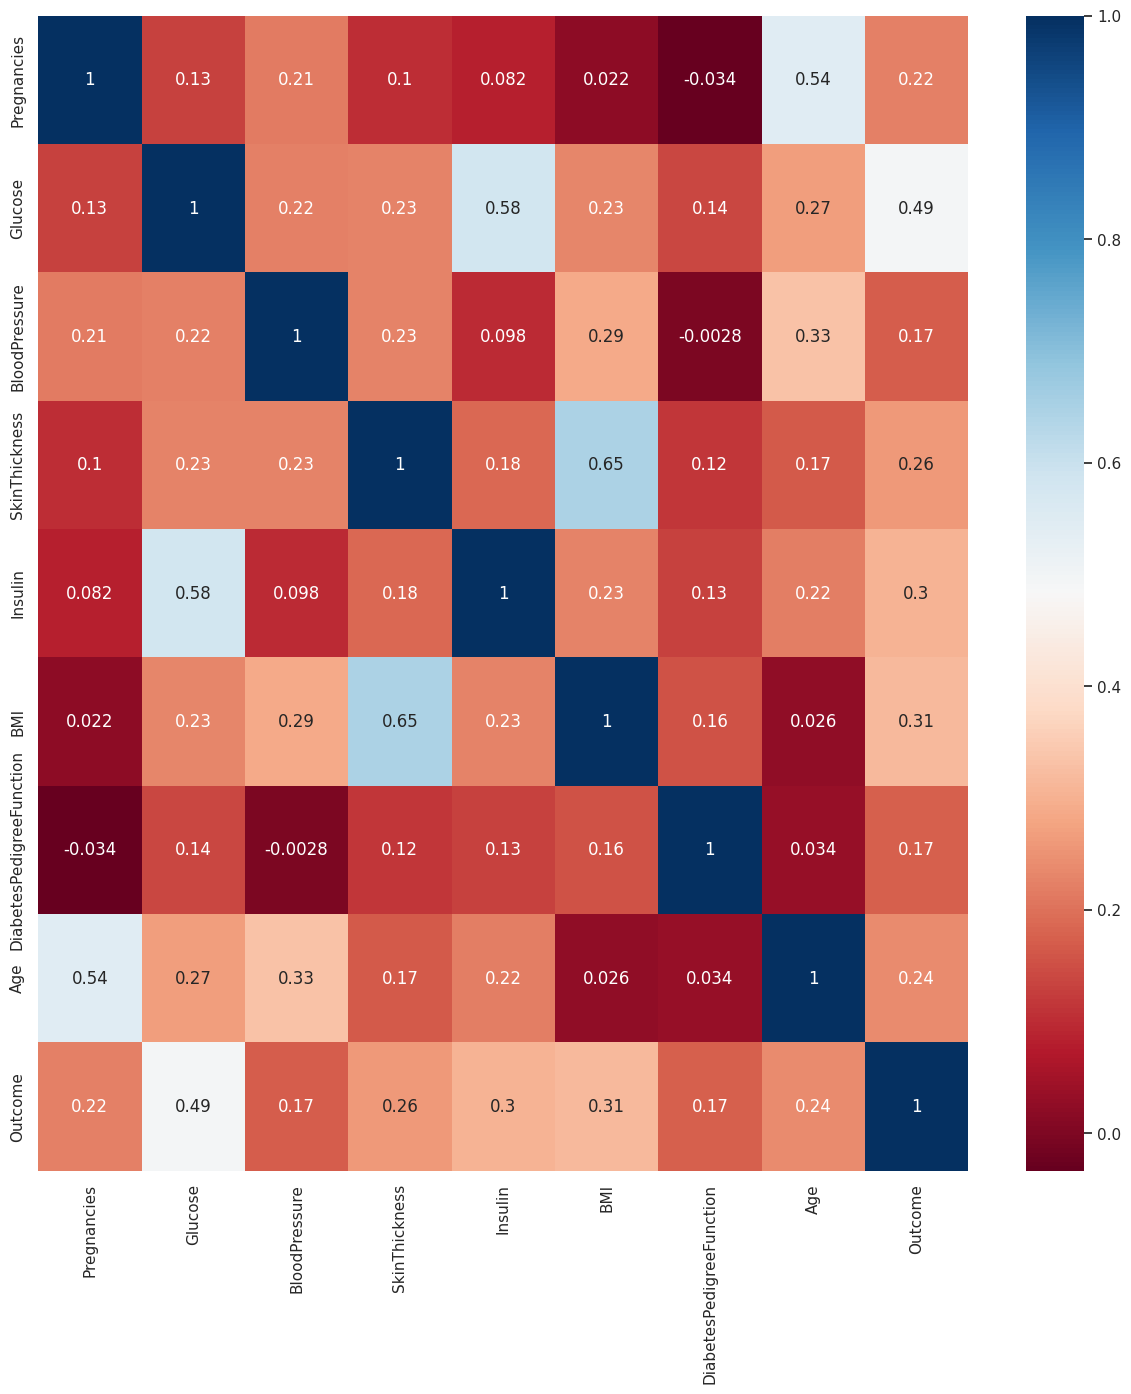

[]

In [27]:
high_correlated_cols(df, plot=True)

# Feature Engineering

## Imputer Selection

In [28]:
def select_imputer(dataframe, target_column, random_state=42):
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    impute_methods = {"mean": SimpleImputer(strategy="mean"),
                      "median": SimpleImputer(strategy="median"),
                      "most_frequent": SimpleImputer(strategy="most_frequent"),
                      "knn": KNNImputer(n_neighbors=5)}

    results = {}

    if dataframe[target_column].dtype not in ["int64", "float64"] or dataframe[target_column].nunique() <= 2:
   
        for method_name, imputer in impute_methods.items():
            X_train_imputed = imputer.fit_transform(X_train)
            X_test_imputed = imputer.transform(X_test)
            
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train_imputed, y_train)
            
            y_pred = model.predict(X_test_imputed)
            f1 = f1_score(y_test, y_pred)
            
            results[method_name] = f1

        for method, f1 in results.items():
            print(f"Impute method: {method}, F1-Score: {f1:.4f}")

    else:

        for method_name, imputer in impute_methods.items():
            X_train_imputed = imputer.fit_transform(X_train)
            X_test_imputed = imputer.transform(X_test)
            
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train_imputed, y_train)
            
            y_pred = model.predict(X_test_imputed)
            rmse = np.sqrt(mean_squared_error(y_train, y_pred))
            
            results[method_name] = rmse

        for method, rmse in results.items():
            print(f"Impute method: {method}, RMSE: {f1:.4f}")   

In [29]:
select_imputer(df, "Outcome")

Impute method: mean, F1-Score: 0.6491
Impute method: median, F1-Score: 0.6552
Impute method: most_frequent, F1-Score: 0.6481
Impute method: knn, F1-Score: 0.6549


> We can choose KNN or Median method. I chose the KNNImputer method.

## Missing Values

In [30]:
missing_col

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [31]:
data_to_fill = df[missing_col]

imputer = KNNImputer(n_neighbors=5)

df[missing_col] = imputer.fit_transform(data_to_fill)

missing_values = df[missing_col].isnull().sum()
print("Filled missing values:")
print(missing_values)

Filled missing values:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## Outliers

In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
for col in df.columns:
    replace_with_thresholds(df,col)

In [34]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


## Base ML Model

In [35]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(report)
print(f"ROC AUC: {roc_auc:.4f}")

              precision    recall  f1-score   support

         0.0     0.8105    0.8267    0.8185       150
         1.0     0.6667    0.6420    0.6541        81

    accuracy                         0.7619       231
   macro avg     0.7386    0.7343    0.7363       231
weighted avg     0.7600    0.7619    0.7608       231

ROC AUC: 0.8382


## Feature Importance

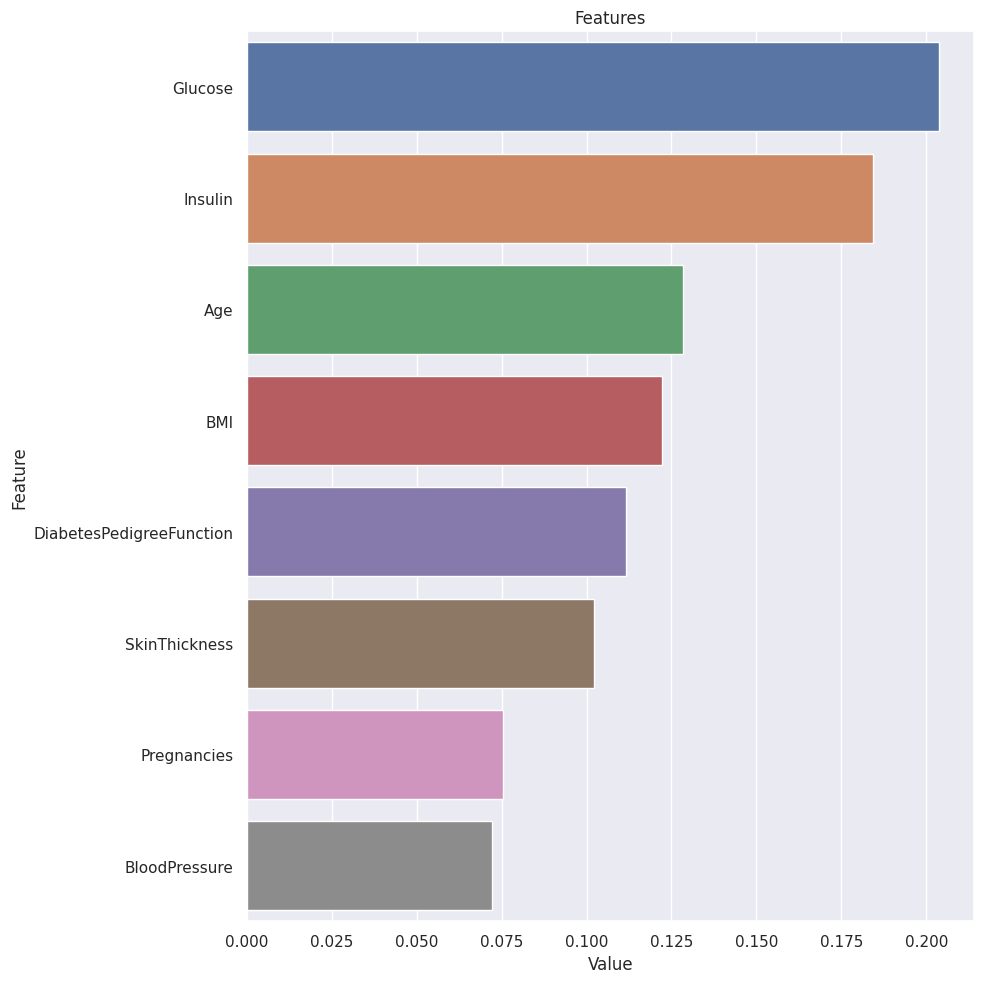

In [36]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(rf_model, X_train, df)

## Feature Extraction

In [37]:
def engineered_features(df):
    df_new = df.copy()
   
    # 1. BMI Categories
    df_new["BMI_Category"] = pd.cut(df_new["BMI"], 
                                    bins=[0, 18.5, 25, 30, np.inf], 
                                    labels=["Underweight", "Normal", "Overweight", "Obese"])
    
    # 2. Age Groups
    df_new["Age_Group"] = pd.cut(df_new["Age"], 
                                 bins=[0, 30, 45, 60, np.inf], 
                                 labels=["Young Adult", "Adult", "Middle-aged", "Senior"])
    
    # 3. Glucose-Insulin Ratio
    df_new["Glucose_Insulin_Ratio"] = df_new["Glucose"] / df_new["Insulin"].replace(0, 1)  # Avoid division by zero
    
    # 4. Hypertension Flag
    df_new["Hypertension_Flag"] = (df_new["BloodPressure"] > 140).astype(int)
    
    # 5. Metabolic Syndrome Score
    df_new["Metabolic_Syndrome_Score"] = ((df_new["BMI"] > 30).astype(int) + 
                                          (df_new["BloodPressure"] > 130).astype(int) + 
                                          (df_new["Glucose"] > 110).astype(int))
    
    # 6. Pregnancy Risk Factor
    df_new["Pregnancy_Risk_Factor"] = df_new["Pregnancies"] * np.log(df_new["Age"])
    
    # 7. Family History Strength
    df_new["Family_History_Strength"] = pd.cut(df_new["DiabetesPedigreeFunction"], 
                                               bins=[0, 0.5, 1, np.inf], 
                                               labels=["Low", "Medium", "High"])
    
    # 8. Insulin Resistance Index (HOMA-IR approximation)
    df_new["Insulin_Resistance_Index"] = (df_new["Glucose"] * df_new["Insulin"]) / 405
    
    # 9. Body Fat Percentage Estimate (using a simplified formula)
    df_new["Body_Fat_Percentage"] = (1.20 * df_new["BMI"]) + (0.23 * df_new["Age"]) - 16.2
    
    # 10. Gestational Diabetes Risk
    df_new["Gestational_Diabetes_Risk"] = np.where(df_new["Pregnancies"] > 0, 
                                                   df_new["Pregnancies"] * df_new["BMI"] * np.log(df_new["Age"]), 
                                                   0)
    
    # 11. Cardiovascular Risk Score
    df_new["Cardiovascular_Risk_Score"] = (df_new["Age"] / 10) + (df_new["BMI"] / 5) + (df_new["BloodPressure"] / 20)
    
    # 12. Prediabetes Flag
    df_new["Prediabetes_Flag"] = ((df_new["Glucose"] >= 100) & (df_new["Glucose"] < 126)).astype(int)
    
    # 13. Glucose Variability Index
    df_new["Glucose_Variability_Index"] = df_new["Glucose"] * np.log(df_new["Insulin"] + 1)
    
    # 14. Metabolic Age
    df_new["Metabolic_Age"] = df_new["Age"] + (df_new["BMI"] - 25) * 5 + (df_new["BloodPressure"] - 90) / 2
    
    # 15. Insulin Sensitivity Factor
    df_new["Insulin_Sensitivity_Factor"] = 1800 / (df_new["Glucose"] * df_new["Insulin"] / 405)
    
    # 16. Visceral Fat Estimate
    df_new["Visceral_Fat_Estimate"] = (df_new["BMI"] * df_new["Age"] * df_new["SkinThickness"]) / 10000
    
    # 17. Glucose-to-Insulin Effect Ratio
    df_new["Glucose_Insulin_Effect_Ratio"] = df_new["Glucose"] / (df_new["Insulin"] + 1) * np.log(df_new["Age"])
    
    # 18. Diabetes Risk Score
    df_new["Diabetes_Risk_Score"] = (0.2 * df_new["Glucose"] +
                                     0.1 * df_new["BMI"] +
                                     0.1 * df_new["BloodPressure"] +
                                     0.3 * df_new["DiabetesPedigreeFunction"] +
                                     0.2 * df_new["Age"] +
                                     0.1 * df_new["Insulin"]) / 6
    
    # 19. Homeostatic Model Assessment (HOMA)
    df_new["HOMA"] = (df_new["Glucose"] * df_new["Insulin"]) / 405
    
    # 20. Glucose-to-BMI Ratio
    df_new["Glucose_BMI_Ratio"] = df_new["Glucose"] / df_new["BMI"]
    
    # 21. Metabolic Syndrome Probability
    df_new["Metabolic_Syndrome_Probability"] = 1 / (1 + np.exp(-(df_new["Metabolic_Syndrome_Score"] - 1.5)))
    
    # 22. Age-Adjusted Glucose
    df_new["Age_Adjusted_Glucose"] = df_new["Glucose"] * (1 + (df_new["Age"] - 30) / 100)
    
    # 23. Insulin Resistance Progression
    df_new["Insulin_Resistance_Progression"] = df_new["Insulin_Resistance_Index"] * np.log(df_new["Age"])
    
    # 24. Composite Health Index
    df_new["Composite_Health_Index"] = ((100 - df_new["Glucose"] / 2) +
                                        (100 - df_new["BloodPressure"]) +
                                        (25 - abs(df_new["BMI"] - 25)) +
                                        (300 - df_new["Insulin"]) / 3) / 4
    
    # 25. Z-score normalization for key metrics
    key_metrics = ["Glucose", "BMI", "BloodPressure", "Insulin"]
    for metric in key_metrics:
        df_new[f"{metric}_Z_Score"] = stats.zscore(df_new[metric])
    
    # 26. Pregnancy-Glucose Interaction
    df_new["Pregnancy_Glucose_Interaction"] = df_new["Pregnancies"] * df_new["Glucose"]
    
    # 27. Diabetes Progression Index
    df_new["Diabetes_Progression_Index"] = (df_new["Glucose"] * 0.3 +
                                            df_new["BMI"] * 0.2 +
                                            df_new["Age"] * 0.2 +
                                            df_new["DiabetesPedigreeFunction"] * 0.3) * \
                                            (1 + df_new["Insulin"] / 1000)
    
    df_new.columns = [col.upper() for col in df_new.columns]

    return df_new

In [38]:
df = engineered_features(df)

df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,BMI_CATEGORY,...,METABOLIC_SYNDROME_PROBABILITY,AGE_ADJUSTED_GLUCOSE,INSULIN_RESISTANCE_PROGRESSION,COMPOSITE_HEALTH_INDEX,GLUCOSE_Z_SCORE,BMI_Z_SCORE,BLOODPRESSURE_Z_SCORE,INSULIN_Z_SCORE,PREGNANCY_GLUCOSE_INTERACTION,DIABETES_PROGRESSION_INDEX
0,6.0,148.0,72.0,35.0,209.0,33.6,0.627,50.0,1.0,Obese,...,0.622459,177.60,298.781964,25.183333,0.862288,0.166726,-0.028635,0.628483,888.0,74.121493
1,1.0,85.0,66.0,29.0,73.0,26.6,0.351,31.0,0.0,Overweight,...,0.182426,85.85,52.612076,47.641667,-1.207101,-0.850799,-0.520992,-0.810479,85.0,39.835447
2,8.0,183.0,64.0,29.4,383.2,23.3,0.672,32.0,1.0,Normal,...,0.377541,186.66,600.090888,10.016667,2.011949,-1.330490,-0.685111,2.471623,1464.0,91.514725
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight,...,0.182426,80.99,62.890061,45.016667,-1.075711,-0.632758,-0.520992,-0.588286,89.0,40.007689
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,Obese,...,0.622459,141.11,198.705230,35.600000,0.500966,1.547653,-2.654536,0.194678,0.0,66.464690


# Encoding

## Label Encoding

In [39]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [40]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [41]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,BMI_CATEGORY,...,METABOLIC_SYNDROME_PROBABILITY,AGE_ADJUSTED_GLUCOSE,INSULIN_RESISTANCE_PROGRESSION,COMPOSITE_HEALTH_INDEX,GLUCOSE_Z_SCORE,BMI_Z_SCORE,BLOODPRESSURE_Z_SCORE,INSULIN_Z_SCORE,PREGNANCY_GLUCOSE_INTERACTION,DIABETES_PROGRESSION_INDEX
0,6.0,148.0,72.0,35.0,209.0,33.6,0.627,50.0,1.0,Obese,...,0.622459,177.60,298.781964,25.183333,0.862288,0.166726,-0.028635,0.628483,888.0,74.121493
1,1.0,85.0,66.0,29.0,73.0,26.6,0.351,31.0,0.0,Overweight,...,0.182426,85.85,52.612076,47.641667,-1.207101,-0.850799,-0.520992,-0.810479,85.0,39.835447
2,8.0,183.0,64.0,29.4,383.2,23.3,0.672,32.0,1.0,Normal,...,0.377541,186.66,600.090888,10.016667,2.011949,-1.330490,-0.685111,2.471623,1464.0,91.514725
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight,...,0.182426,80.99,62.890061,45.016667,-1.075711,-0.632758,-0.520992,-0.588286,89.0,40.007689
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,Obese,...,0.622459,141.11,198.705230,35.600000,0.500966,1.547653,-2.654536,0.194678,0.0,66.464690


## One-Hot Encoding

In [42]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [43]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

In [44]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,GLUCOSE_INSULIN_RATIO,...,AGE_GROUP_Senior,METABOLIC_SYNDROME_SCORE_0,METABOLIC_SYNDROME_SCORE_1,METABOLIC_SYNDROME_SCORE_2,FAMILY_HISTORY_STRENGTH_Low,FAMILY_HISTORY_STRENGTH_Medium,FAMILY_HISTORY_STRENGTH_High,METABOLIC_SYNDROME_PROBABILITY_0.18242552380635635,METABOLIC_SYNDROME_PROBABILITY_0.3775406687981454,METABOLIC_SYNDROME_PROBABILITY_0.6224593312018546
0,6.0,148.0,72.0,35.0,209.0,33.6,0.627,50.0,1.0,0.708134,...,False,False,False,True,False,True,False,False,False,True
1,1.0,85.0,66.0,29.0,73.0,26.6,0.351,31.0,0.0,1.164384,...,False,True,False,False,True,False,False,True,False,False
2,8.0,183.0,64.0,29.4,383.2,23.3,0.672,32.0,1.0,0.477557,...,False,False,True,False,False,True,False,False,True,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.946809,...,False,True,False,False,True,False,False,True,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,0.815476,...,False,False,False,True,False,False,True,False,False,True


## Rare Encoding

In [45]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [46]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols = [col for col in cat_cols if "OUTCOME" not in col]

Observations: 768
Variables: 51
cat_cols: 20
num_cols: 31
cat_but_car: 0
num_but_cat: 20


In [47]:
rare_analyser(df, "OUTCOME", cat_cols)

HYPERTENSION_FLAG : 1
                   COUNT  RATIO  TARGET_MEAN
HYPERTENSION_FLAG                           
0                    768    1.0     0.348958


PREDIABETES_FLAG : 2
                  COUNT     RATIO  TARGET_MEAN
PREDIABETES_FLAG                              
0                   493  0.641927     0.389452
1                   275  0.358073     0.276364


BMI_CATEGORY_Underweight : 2
                          COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Underweight                              
False                       764  0.994792     0.350785
True                          4  0.005208     0.000000


BMI_CATEGORY_Normal : 2
                     COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Normal                              
False                  660  0.859375     0.395455
True                   108  0.140625     0.064815


BMI_CATEGORY_Overweight : 2
                         COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Overweight                              
False            

In [48]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

useless_cols

['BMI_CATEGORY_Underweight']

In [49]:
df.drop(useless_cols, axis=1, inplace=True)

In [50]:
def rare_encoder(dataframe, rare_perc, cat_cols):

    # Correction if there is more than 1 rare. status considered.
    # After the rare class query is made according to 0.01, the sum of the incoming true"s is taken.
    # If it is greater than 1, it is taken to the rare cols list.

    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(dataframe) < 0.01).sum() > 1]

    for col in rare_columns:
        tmp = dataframe[col].value_counts() / len(dataframe)
        rare_labels = tmp[tmp < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), "Rare", dataframe[col])

    return dataframe

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols = [col for col in cat_cols if "OUTCOME" not in col]

Observations: 768
Variables: 50
cat_cols: 19
num_cols: 31
cat_but_car: 0
num_but_cat: 19


In [52]:
df = rare_encoder(df, 0.01, cat_cols)

df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,GLUCOSE_INSULIN_RATIO,...,AGE_GROUP_Senior,METABOLIC_SYNDROME_SCORE_0,METABOLIC_SYNDROME_SCORE_1,METABOLIC_SYNDROME_SCORE_2,FAMILY_HISTORY_STRENGTH_Low,FAMILY_HISTORY_STRENGTH_Medium,FAMILY_HISTORY_STRENGTH_High,METABOLIC_SYNDROME_PROBABILITY_0.18242552380635635,METABOLIC_SYNDROME_PROBABILITY_0.3775406687981454,METABOLIC_SYNDROME_PROBABILITY_0.6224593312018546
0,6.0,148.0,72.0,35.0,209.0,33.6,0.627,50.0,1.0,0.708134,...,False,False,False,True,False,True,False,False,False,True
1,1.0,85.0,66.0,29.0,73.0,26.6,0.351,31.0,0.0,1.164384,...,False,True,False,False,True,False,False,True,False,False
2,8.0,183.0,64.0,29.4,383.2,23.3,0.672,32.0,1.0,0.477557,...,False,False,True,False,False,True,False,False,True,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.946809,...,False,True,False,False,True,False,False,True,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,0.815476,...,False,False,False,True,False,False,True,False,False,True


In [53]:
rare_analyser(df, "OUTCOME", cat_cols)

HYPERTENSION_FLAG : 1
                   COUNT  RATIO  TARGET_MEAN
HYPERTENSION_FLAG                           
0                    768    1.0     0.348958


PREDIABETES_FLAG : 2
                  COUNT     RATIO  TARGET_MEAN
PREDIABETES_FLAG                              
0                   493  0.641927     0.389452
1                   275  0.358073     0.276364


BMI_CATEGORY_Normal : 2
                     COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Normal                              
False                  660  0.859375     0.395455
True                   108  0.140625     0.064815


BMI_CATEGORY_Overweight : 2
                         COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Overweight                              
False                      585  0.761719     0.382906
True                       183  0.238281     0.240437


BMI_CATEGORY_Obese : 2
                    COUNT     RATIO  TARGET_MEAN
BMI_CATEGORY_Obese                              
False                 295  0.384115  

# Standartization

In [54]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Observations: 768
Variables: 50
cat_cols: 19
num_cols: 31
cat_but_car: 0
num_but_cat: 19


In [55]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,GLUCOSE_INSULIN_RATIO,...,AGE_GROUP_Senior,METABOLIC_SYNDROME_SCORE_0,METABOLIC_SYNDROME_SCORE_1,METABOLIC_SYNDROME_SCORE_2,FAMILY_HISTORY_STRENGTH_Low,FAMILY_HISTORY_STRENGTH_Medium,FAMILY_HISTORY_STRENGTH_High,METABOLIC_SYNDROME_PROBABILITY_0.18242552380635635,METABOLIC_SYNDROME_PROBABILITY_0.3775406687981454,METABOLIC_SYNDROME_PROBABILITY_0.6224593312018546
0,0.639947,0.862288,-0.028635,0.660017,0.628483,0.166726,0.487381,1.425995,1.0,-0.482733,...,False,False,False,True,False,True,False,False,False,True
1,-0.844885,-1.207101,-0.520992,0.015197,-0.810479,-0.850799,-0.369864,-0.190672,0.0,0.128949,...,False,True,False,False,True,False,False,True,False,False
2,1.233880,2.011949,-0.685111,0.058185,2.471623,-1.330490,0.627149,-0.105584,1.0,-0.791861,...,False,False,True,False,False,True,False,False,True,False
3,-0.844885,-1.075711,-0.520992,-0.629623,-0.588286,-0.632758,-0.941361,-1.041549,0.0,-0.162748,...,False,True,False,False,True,False,False,True,False,False
4,-1.141852,0.500966,-2.654536,0.660017,0.194678,1.547653,4.593462,-0.020496,1.0,-0.338822,...,False,False,False,True,False,False,True,False,False,True


# ML Model

In [56]:
y = df["OUTCOME"]
X = df.drop(["OUTCOME"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(report)
print(f"ROC AUC: {roc_auc:.4f}")

              precision    recall  f1-score   support

         0.0     0.8052    0.8267    0.8158       150
         1.0     0.6623    0.6296    0.6456        81

    accuracy                         0.7576       231
   macro avg     0.7338    0.7281    0.7307       231
weighted avg     0.7551    0.7576    0.7561       231

ROC AUC: 0.8441


## Feature Importance

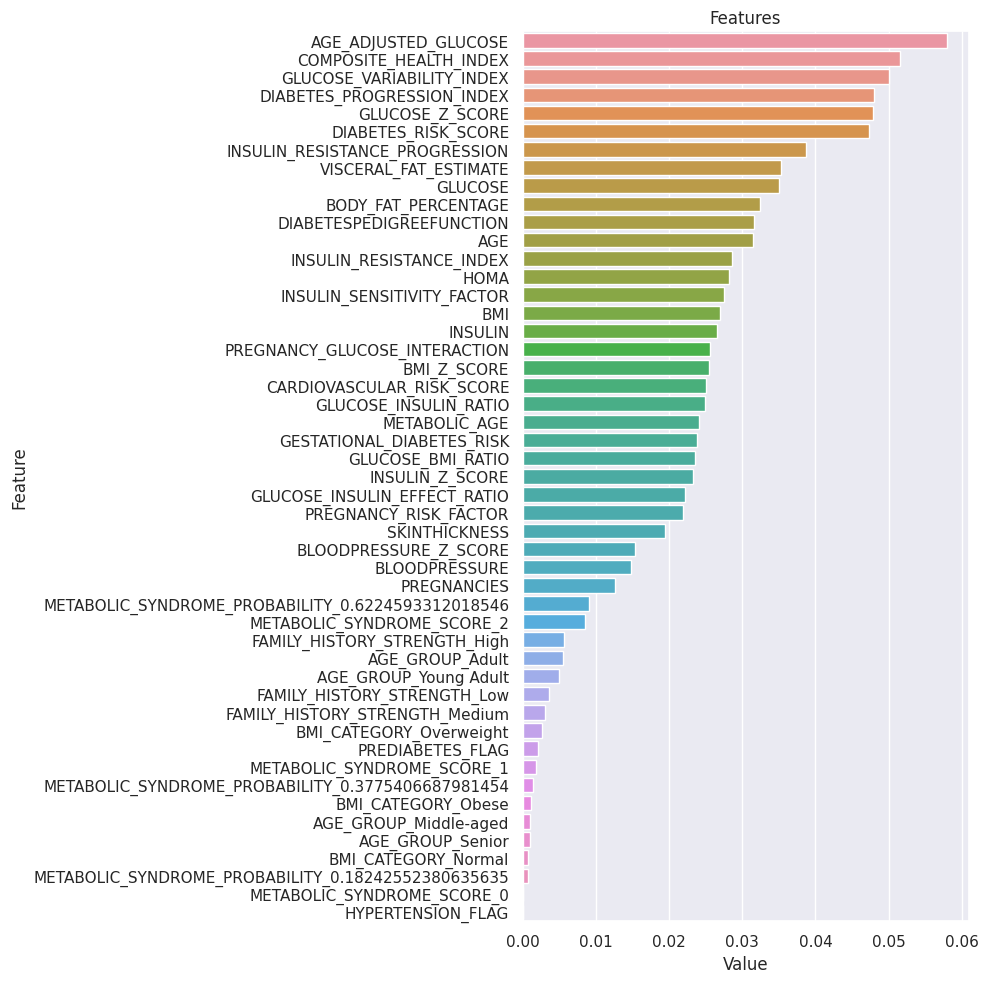

In [57]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

plot_importance(rf_model, X_train, df)